In [5]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns

from matplotlib.colors import TwoSlopeNorm

import os.path as op
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test
from scipy.stats import pearsonr

from mne_connectivity import spectral_connectivity_epochs, seed_target_indices
from mne.datasets import sample
from mne_connectivity.viz import plot_sensors_connectivity
from mne.stats import permutation_cluster_test
from scipy import stats as stats
from functools import partial
import scipy

print(__doc__)

Automatically created module for IPython interactive environment


In [6]:
dict015= {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FT9':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg','FT10':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','TP9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','TP10':'eeg','P7':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_imp = {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','FT9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','FT10':'eeg','TP9':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_exp = dict015

dict011_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg','T7':'eeg','FT10':'eeg',
               'CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'FT9':'eeg', 'TP10':'eeg','P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg',
               'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
              'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict011_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FT10':'eeg', 'FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
               'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'TP9':'eeg', 'P8':'eeg','P4':'eeg','Pz':'eeg',
               'P3':'eeg','P7':'eeg','O2':'eeg', 'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs',
               'DBS6-7':'dbs','DBS7-8':'dbs', 'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}
           
    
#'DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs','mean(DBS1-234, DBS234-567, DBS567-8)':'dbs',

dict08_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',             
                'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict08_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FC6':'eeg', 'FC2':'eeg','FC1':'eeg','FC5':'eeg',
                'T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg', 'T7':'eeg','FT10':'eeg', 'CP6':'eeg','CP2':'eeg',
                'CP1':'eeg','CP5':'eeg','FT9':'eeg','TP10':'eeg', 'P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg',
                'O2':'eeg','O1':'eeg',
                'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',         
                'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_imp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs',
                'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',
                'DynR':'misc','DynL':'misc','DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_exp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P8':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg','O1':'eeg',
                'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs',
                'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',
                'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict_eog= {'FP1':'eog'}

Adding metadata with 9 columns
404 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 101 epochs: 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
431 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 106 epochs: 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
600 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 144 epochs: 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
599 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 148 epochs: 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
494 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 123 epochs: 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
445 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 127 epochs: 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
392 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 98 epochs: 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
496 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 118 epochs: 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
500 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 124 epochs: 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
500 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 122 epochs: 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
498 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 123 epochs: 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


Adding metadata with 9 columns
495 matching events found
No baseline correction applied
Dropped 0 epochs: 
Dropped 121 epochs: 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184


C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:67: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_odd.set_channel_types(dict_eog)
C:\Users\malann\AppData\Local\Temp\ipykernel_648684\1803254359.py:68: RuntimeWarning: The unit for channel(s) FP1 has changed from NA to V.
  epochs_aff_typ.set_channel_types(dict_eog)


<Figure size 640x480 with 0 Axes>

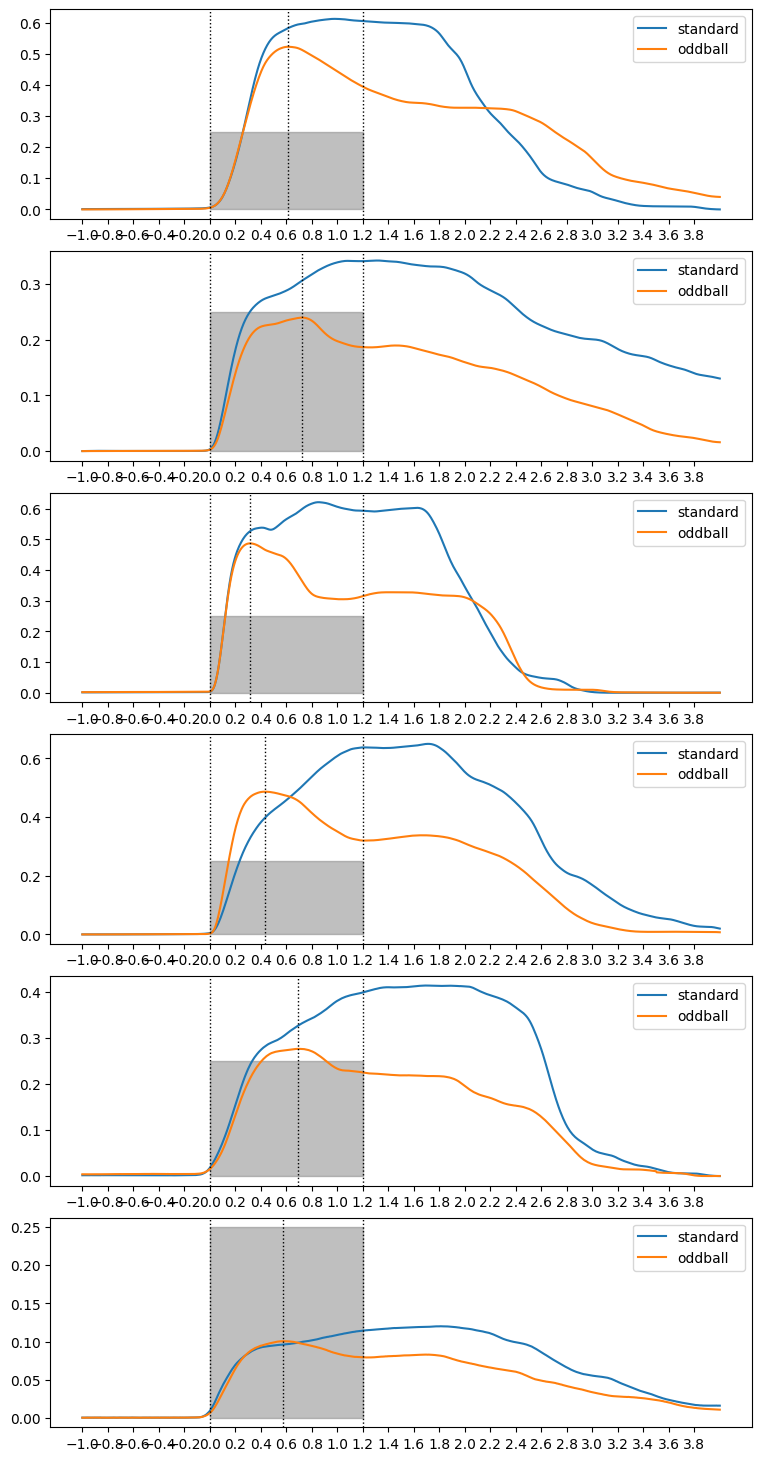

<Figure size 640x480 with 0 Axes>

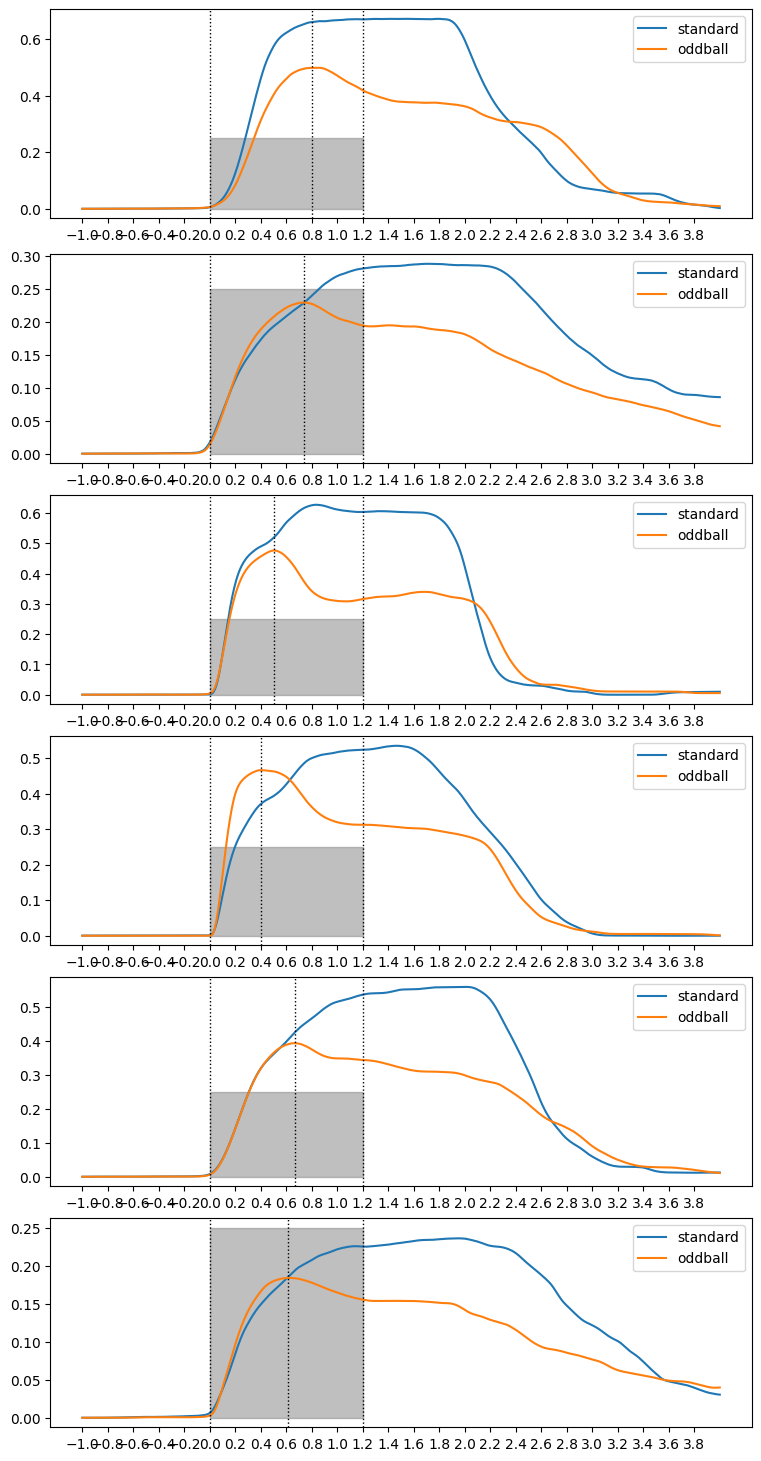

In [22]:
base_dir = "E:/Oddball Data/"
subj_list = ['007','008','011','013','014','015']
#subj_list = ['007']

stage = ['implant','explant']#, 'implant']explant
aff_cond = ['1', '101'];
aff_cond_plot = ['Standard', 'Oddball'];

naff_cond = ['10', '110'];

hand = 'naff'

if hand == 'naff':
    aff_cond = naff_cond
    

#fig, ax1 = plt.subplots(figsize=(4.5, 10.5), nrows=3, ncols=2, layout="constrained")


for axi, st in enumerate(stage):
    ERR_value_all = []
    slope_value_all = []
    
    
    plt.figure()
    fig, axes = plt.subplots(figsize=(7.5, 14.5), nrows=6, ncols=1, layout="constrained")

    for ax, sub in zip(axes, subj_list):
        data_dir = base_dir+"EDEN"+sub+'/ANALYSIS/'
        
        if hand == 'naff':
            fname = data_dir+"data_clean"+st+'_naff_cond.mat'
            dyno = 'DynR(lc)'
        else:
            fname = data_dir+"data_clean"+st+'.mat'
            dyno = 'DynL(lc)'        
                
        if sub == '015' or sub=='014':
            dict1 = dict015
        elif sub == '013' and st== 'implant':
            dict1 = dict013_imp
        elif sub == '013' and st== 'explant':
            dict1 = dict013_exp
        elif sub == '011' and st== 'implant':
            dict1 = dict011_imp
        elif sub == '011' and st== 'explant':
            dict1 = dict011_exp
        elif sub == '008' and st== 'implant':
            dict1 = dict08_imp
        elif sub == '008' and st== 'explant':
            dict1 = dict08_exp
        elif sub == '007' and st== 'implant':
            dict1 = dict07_imp
        elif sub == '007' and st== 'explant':
            dict1 = dict07_exp

        info = mne.create_info(list(dict1.keys()), sfreq=200, ch_types='misc', verbose=None)
        epochs = mne.read_epochs_fieldtrip(fname,info,data_name='x', trialinfo_column=0)
        
        sfreq = epochs.info['sfreq']

        epochs_aff_odd = epochs[aff_cond[1]]
        epochs_aff_typ = epochs[aff_cond[0]]

        mne.epochs.equalize_epoch_counts([epochs_aff_odd,epochs_aff_typ], method='truncate')
        
        epochs_aff_odd.set_channel_types(dict_eog)
        epochs_aff_typ.set_channel_types(dict_eog)
        
        tmax = 4
        Dynmo_odd = epochs_aff_odd.copy().crop(-1,tmax).get_data(picks=dyno)
        Dynmo_odd = Dynmo_odd.reshape(Dynmo_odd.shape[0],Dynmo_odd.shape[2])
        
        #Calculate Error Rate
        ERR_value = []
        for i in range(len(Dynmo_odd)):
            ERR_value1 = (Dynmo_odd[i,:].max()-Dynmo_odd[i,420])/Dynmo_odd[i,420]
            ERR_value.append(ERR_value1)
        ERR_value_all.append(ERR_value)
        
        
        #Calculate Slope
        slope_value = []
        for i in range(len(Dynmo_odd)): 
            f_max_time_trail = np.argmax(epochs_aff_odd.copy().crop(0,1).get_data(picks=dyno).reshape(epochs_aff_odd.copy().crop(0,1).get_data(picks=dyno).shape[0],epochs_aff_odd.copy().crop(0,1).get_data(picks=dyno).shape[2])[i])/200
            slope_value1 = 1/f_max_time_trail
            slope_value.append(slope_value1)
        slope_value_all.append(slope_value)      
        
        Dynmo_odd= Dynmo_odd.mean(axis=0)
        Dynmo_odd = Dynmo_odd-Dynmo_odd.min()
        
        Dynmo_typ = epochs_aff_typ.copy().crop(-1,tmax).get_data(picks=dyno)
        Dynmo_typ= Dynmo_typ.reshape(Dynmo_typ.shape[0],Dynmo_typ.shape[2]).mean(axis=0)
        Dynmo_typ = Dynmo_typ-Dynmo_typ.min()
        f_max_time = np.argmax(epochs_aff_odd.copy().crop(0,1).get_data(picks=dyno).reshape(epochs_aff_odd.copy().crop(0,1).get_data(picks=dyno).shape[0],epochs_aff_odd.copy().crop(0,1).get_data(picks=dyno).shape[2]).mean(axis=0))/200


        time= epochs_aff_typ.copy().crop(-1,tmax).times

        ax.plot(epochs_aff_typ.copy().crop(-1,tmax).times,Dynmo_typ)
        ax.plot(epochs_aff_odd.copy().crop(-1,tmax).times,Dynmo_odd)

        x=np.arange(-1,tmax,0.2)

        ax.set_xticks(x)
        idx = np.argwhere(np.diff(np.sign(Dynmo_typ - Dynmo_odd))).flatten()

        ax.axvline(0, linewidth=1, color="black", linestyle=":")

        ax.axvline(f_max_time, linewidth=1, color="black", linestyle=":")
        ax.axvline(1.2, linewidth=1, color="black", linestyle=":")
        ax.fill_betweenx(np.array((0,0.25)), 1.2,0,color='gray', alpha=0.5)

        ax.legend(['standard','oddball'])


    # Error Rate 
           
    ERR_value_all_corr = []
    for i,n in enumerate(ERR_value_all):
        ERR_value_all_corr1 = []
        for j,m in enumerate(n):
            if m<np.array(n).mean()+3*stats.sem(np.array(n)) and m>np.array(n).mean()-3*stats.sem(np.array(n)):
                ERR_value_all_corr1.append(ERR_value_all[i][j])
        ERR_value_all_corr.append(ERR_value_all_corr1)
    
    # Slope 
    
    slope_value_all_corr = []
    for i,n in enumerate(slope_value_all):
        slope_value_all_corr1 = []
        for j,m in enumerate(n):
            if m<np.array(n).mean()+3*stats.sem(np.array(n)) and m>np.array(n).mean()-3*stats.sem(np.array(n)):
                slope_value_all_corr1.append(slope_value_all[i][j])
        slope_value_all_corr.append(slope_value_all_corr1)

   #Correlation between slope and Error rate
    
    ERR_mean_all = [] 
    for i,n in enumerate(ERR_value_all_corr):
        ERR_mean_all.append(np.array(n).mean())
    slope_mean_all = [] 
    for i,n in enumerate(slope_value_all_corr):
        slope_mean_all.append(np.array(n).mean())
          
    if st=='implant':
        
        ERR_all_implant = ERR_value_all_corr
        ERR_mean_all_implant = ERR_mean_all
        slope_mean_all_implant = slope_mean_all
        slope_all_implant = slope_value_all_corr
    else:
        ERR_all_explant = ERR_value_all_corr
        ERR_mean_all_explant = ERR_mean_all
        slope_mean_all_explant = slope_mean_all
        slope_all_explant = slope_value_all_corr 


# Behavioral Analysis

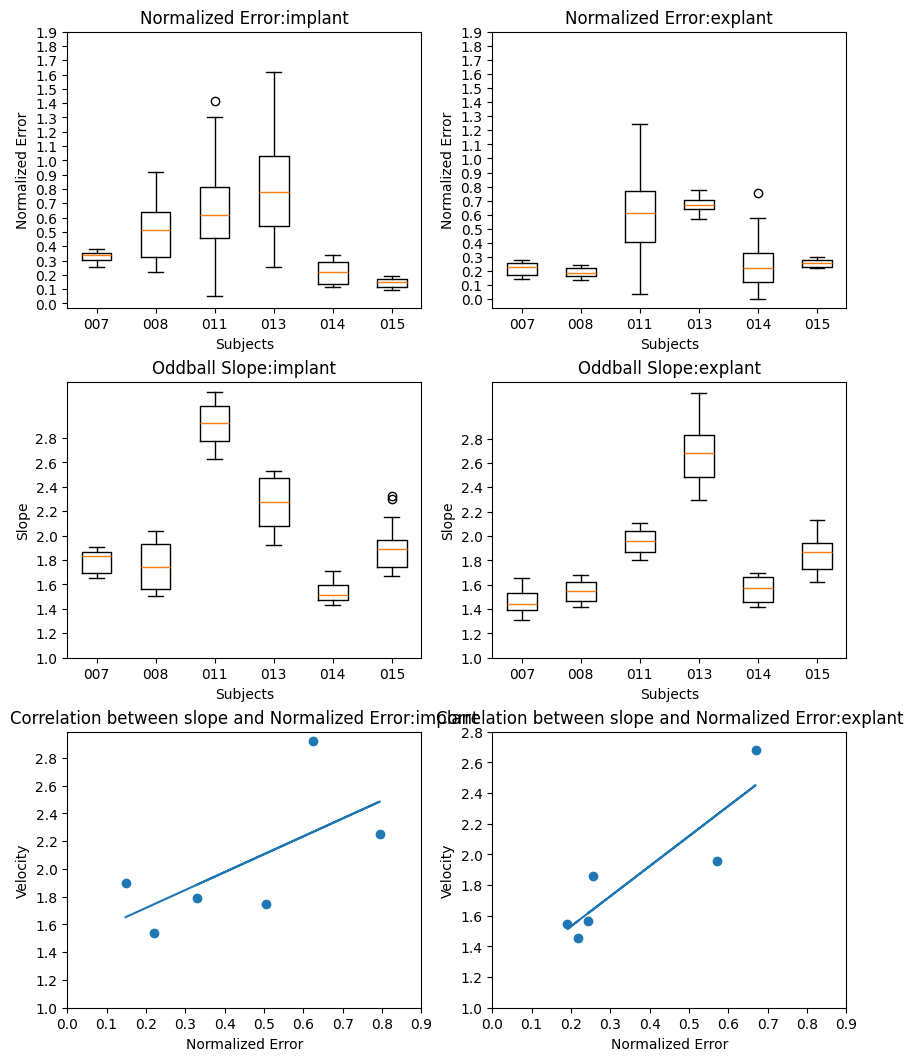

In [18]:
fig, ax1 = plt.subplots(figsize=(8.5, 10.5), nrows=3, ncols=2, layout="constrained")

for axi, st in enumerate(stage):

    if st=='implant':

        ERR_value_all_corr = ERR_all_implant
        ERR_mean_all = ERR_mean_all_implant 
        slope_mean_all = slope_mean_all_implant
        slope_value_all_corr = slope_all_implant 
    else:

        ERR_value_all_corr = ERR_all_explant
        ERR_mean_all = ERR_mean_all_explant 
        slope_mean_all = slope_mean_all_explant
        slope_value_all_corr = slope_all_explant 
       

    ax1[0,axi].boxplot(ERR_value_all_corr)
    yticks = np.arange(0,2, 0.1)
    ax1[0,axi].set_yticks(yticks)
    ax1[0,axi].set_title(f"Normalized Error:{st}")
    ax1[0,axi].set_ylabel('Normalized Error')
    ax1[0,axi].set_xlabel('Subjects')
    ax1[0,axi].set_xticks(range(1,len(subj_list)+1),subj_list)

    ax1[1,axi].boxplot(slope_value_all_corr)
    ax1[1,axi].set_title(f"Oddball Slope:{st}")
    ax1[1,axi].set_ylabel('Slope')
    ax1[1,axi].set_xlabel('Subjects')
    yticks = np.arange(1,3, 0.2)
    ax1[1,axi].set_yticks(yticks)
    ax1[1,axi].set_xticks(range(1,len(subj_list)+1),subj_list)


    ax1[2,axi].scatter(ERR_mean_all,slope_mean_all)
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(ERR_mean_all,slope_mean_all, 1)    
    #add linear regression line to scatterplot 
    ax1[2,axi].plot(ERR_mean_all, m*np.array(ERR_mean_all)+b)
    ax1[2,axi].set_title(f"Correlation between slope and Normalized Error:{st}")
    ax1[2,axi].set_xlabel('Normalized Error')
    ax1[2,axi].set_ylabel('Velocity')
    yticks = np.arange(1,3, 0.2)
    ax1[2,axi].set_yticks(yticks)
    xticks = np.arange(0,1, 0.1)
    ax1[2,axi].set_xticks(xticks)

    #tstats,p_val = scipy.stats.spearmanr(ERR_mean_all,slope_mean_all)
    #print(stats)
    #print(p_val)


<module 'scipy.stats' from 'C:\\Users\\malann\\AppData\\Local\\anaconda3\\lib\\site-packages\\scipy\\stats\\__init__.py'>
0.007355028857805126


Text(0.5, 2, 'p =0.007355028857805126')

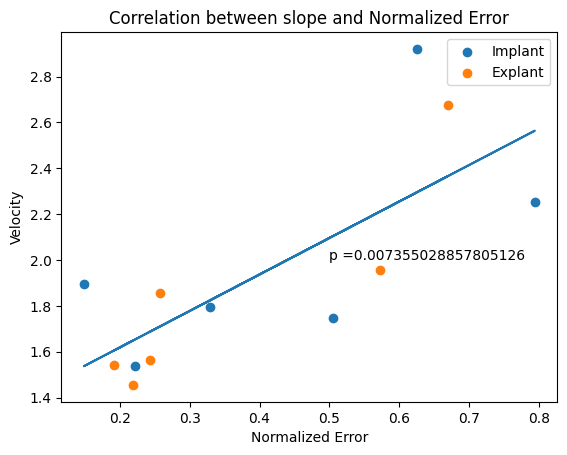

In [19]:
plt.scatter(ERR_mean_all_implant,slope_mean_all_implant)
plt.scatter(ERR_mean_all_explant,slope_mean_all_explant)


ERR_mean= ERR_mean_all_implant+ERR_mean_all_explant
slope_mean = slope_mean_all_implant+slope_mean_all_explant
    #obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(ERR_mean,slope_mean, 1)    
    #add linear regression line to scatterplot 
plt.plot(ERR_mean, m*np.array(ERR_mean)+b)
plt.legend(["Implant", "Explant"])
plt.title(f"Correlation between slope and Normalized Error")
plt.xlabel('Normalized Error')
plt.ylabel('Velocity')


tstats,p_val = scipy.stats.spearmanr(ERR_mean,slope_mean)
print(stats)
print(p_val)
#plt.text(1, 2, stats)
plt.text(0.5, 2, f'p ={p_val}')


Text(0.5, 0, 'Subject')

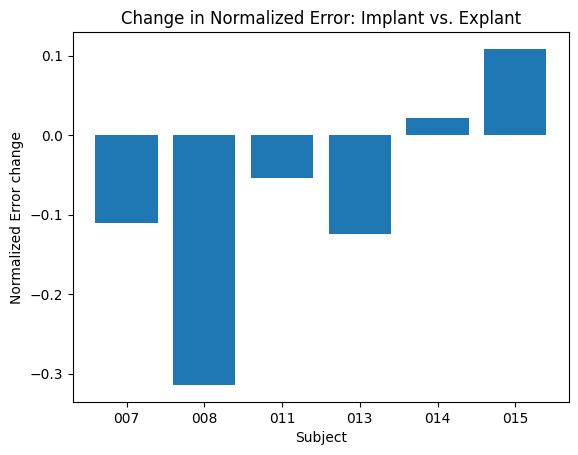

In [20]:
# plot percentage change in Error
err_change = np.array(ERR_mean_all_explant)-np.array(ERR_mean_all_implant)
plt.bar(subj_list,err_change)
plt.title("Change in Normalized Error: Implant vs. Explant")
plt.ylabel("Normalized Error change")
plt.xlabel("Subject")

Text(0.5, 0, 'Subject')

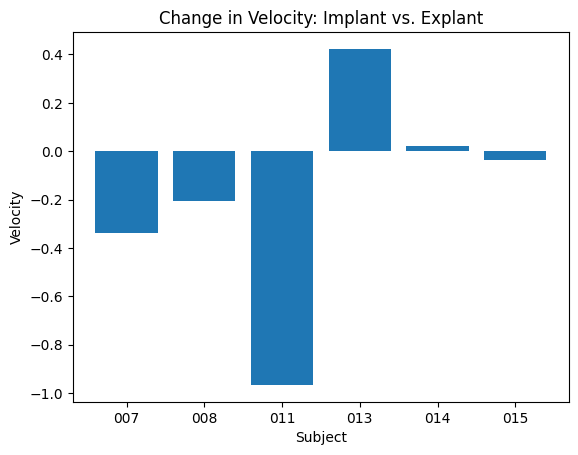

In [21]:
# plot percentage change in slope
slope_change = np.array(slope_mean_all_explant)-np.array(slope_mean_all_implant)
plt.bar(subj_list,slope_change)
plt.title("Change in Velocity: Implant vs. Explant")
plt.ylabel("Velocity")
plt.xlabel("Subject")

In [22]:
# correlation with UEFMS and AMT
UEFMS_implant = {'007':5,'008':10,'011':12,'013':7,'014':7,'015':9}
UEFMS_explant = {'007':6,'008':16,'011':20,'013':17,'014':20,'015':19}
UEFMS_change = {'007':20,'008':60,'011':67,'013':143,'014':186,'015':111}

AMT_implant = {'007':1.64,'008':3.75,'011':2.82,'013':2.92,'014':2.71,'015':3.14}
AMT_explant = {'007':2.53,'008':4.46,'011':4.32,'013':4.64,'014':4.35,'015':4.60}
AMT_change = {'007':54.3,'008':19.0,'011':53.2,'013':58.5,'014':60.5,'015':46.6}


UEFMS_delta = {'007':1,'008':6,'011':8,'013':10,'014':13,'015':10}

AMT_delta = {'007':25,'008':20,'011':42,'013':48,'014':46,'015':41}


<module 'scipy.stats' from 'C:\\Users\\malann\\AppData\\Local\\anaconda3\\lib\\site-packages\\scipy\\stats\\__init__.py'>
0.016479079029359467


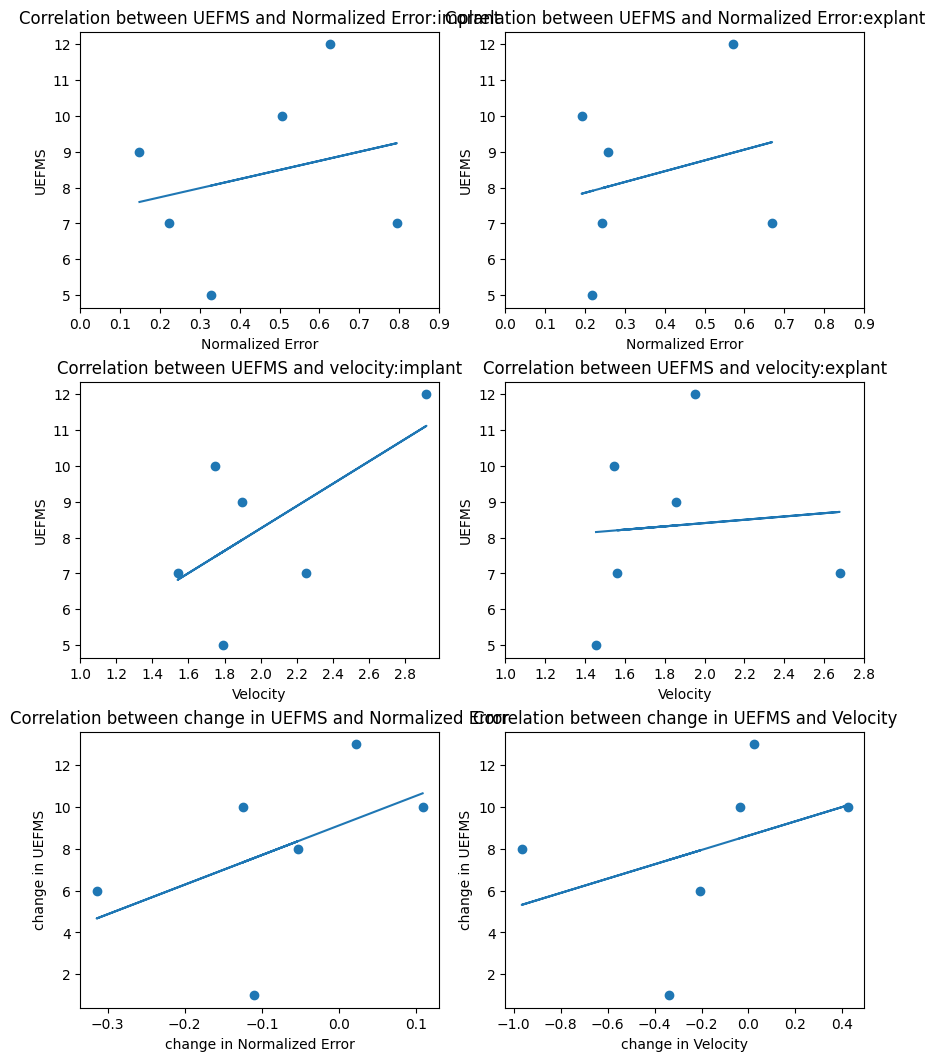

In [23]:
fig, ax1 = plt.subplots(figsize=(8.5, 10.5), nrows=3, ncols=2, layout="constrained")

for axi, st in enumerate(stage):

    if st=='implant':

        ERR_value_all_corr = ERR_all_implant
        ERR_mean_all = ERR_mean_all_implant 
        slope_mean_all = slope_mean_all_implant
        slope_value_all_corr = slope_all_implant 
    else:

        ERR_value_all_corr = ERR_all_explant
        ERR_mean_all = ERR_mean_all_explant 
        slope_mean_all = slope_mean_all_explant
        slope_value_all_corr = slope_all_explant 

        
    ax1[0,axi].scatter(ERR_mean_all,list(UEFMS_implant.values()))
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(ERR_mean_all,list(UEFMS_implant.values()), 1)    
    #add linear regression line to scatterplot 
    ax1[0,axi].plot(ERR_mean_all, m*np.array(ERR_mean_all)+b)
    ax1[0,axi].set_title(f"Correlation between UEFMS and Normalized Error:{st}")
    ax1[0,axi].set_xlabel('Normalized Error')
    ax1[0,axi].set_ylabel('UEFMS')
#    yticks = np.arange(1,3, 0.2)
#    ax1[0,axi].set_yticks(yticks)
    xticks = np.arange(0,1, 0.1)
    ax1[0,axi].set_xticks(xticks)
        

    ax1[1,axi].scatter(slope_mean_all,UEFMS_implant.values())
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(slope_mean_all,list(UEFMS_implant.values()), 1)    
    #add linear regression line to scatterplot 
    ax1[1,axi].plot(slope_mean_all, m*np.array(slope_mean_all)+b)
    ax1[1,axi].set_title(f"Correlation between UEFMS and velocity:{st}")
    ax1[1,axi].set_xlabel('Velocity')
    ax1[1,axi].set_ylabel('UEFMS')
#    yticks = np.arange(1,3, 0.2)
#    ax1[1,axi].set_yticks(yticks)
    xticks = np.arange(1,3, 0.2)
    ax1[1,axi].set_xticks(xticks)
        

ax1[2,0].scatter(err_change,UEFMS_delta.values())
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(err_change,list(UEFMS_delta.values()), 1)    
#add linear regression line to scatterplot 
ax1[2,0].plot(err_change, m*np.array(err_change)+b)
ax1[2,0].set_title(f"Correlation between change in UEFMS and Normalized Error")
ax1[2,0].set_ylabel('change in UEFMS')
ax1[2,0].set_xlabel('change in Normalized Error')
#yticks = np.arange(1,3, 0.2)
#ax1[2,axi].set_yticks(yticks)
#xticks = np.arange(0,1, 0.1)
#ax1[2,axi].set_xticks(xticks)


ax1[2,axi].scatter(slope_change,UEFMS_delta.values())
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(slope_change,list(UEFMS_delta.values()), 1)    
#add linear regression line to scatterplot 
ax1[2,1].plot(slope_change, m*np.array(slope_change)+b)
ax1[2,1].set_title(f"Correlation between change in UEFMS and Velocity")
ax1[2,1].set_ylabel('change in UEFMS')
ax1[2,1].set_xlabel('change in Velocity')
#yticks = np.arange(1,3, 0.2)
#ax1[2,axi].set_yticks(yticks)
#xticks = np.arange(0,1, 0.1)
#ax1[2,axi].set_xticks(xticks)


tstats,p_val = pearsonr(ERR_mean_all,slope_mean_all)
print(stats)
print(p_val)


<module 'scipy.stats' from 'C:\\Users\\malann\\AppData\\Local\\anaconda3\\lib\\site-packages\\scipy\\stats\\__init__.py'>
0.016479079029359467


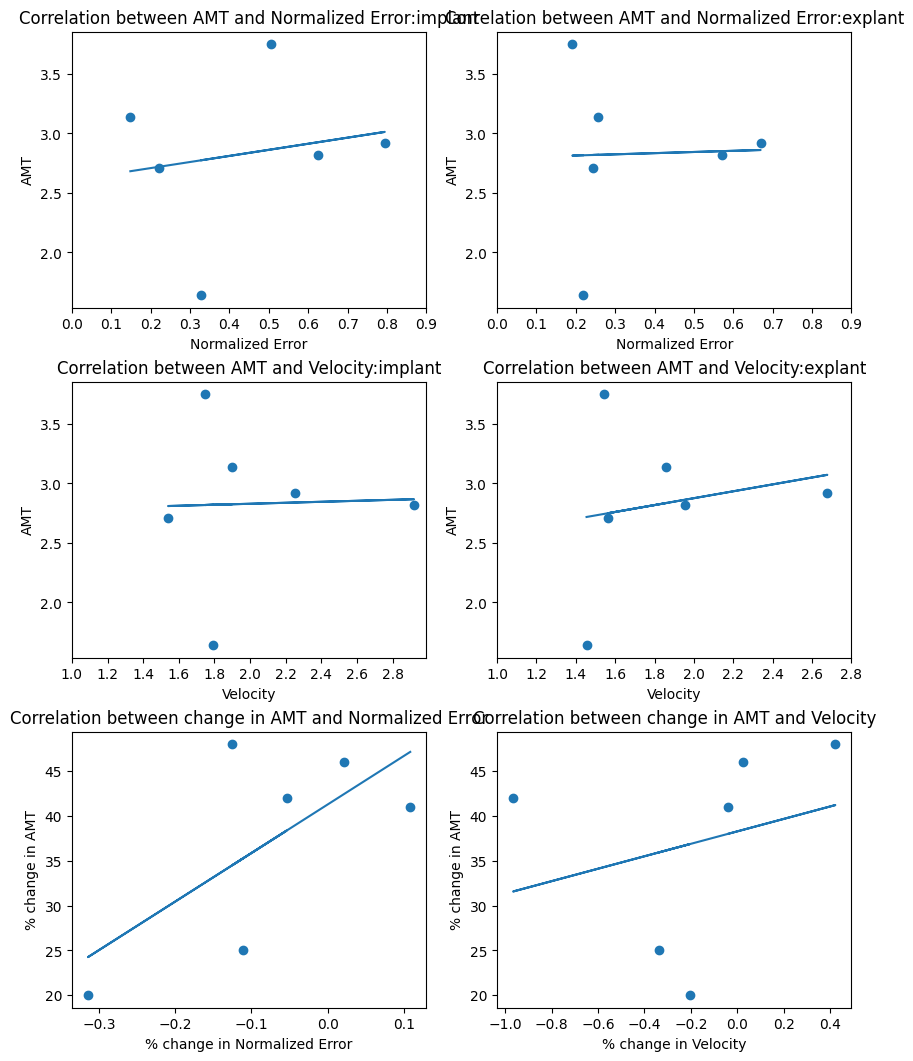

In [24]:
fig, ax1 = plt.subplots(figsize=(8.5, 10.5), nrows=3, ncols=2, layout="constrained")

for axi, st in enumerate(stage):

    if st=='implant':

        ERR_value_all_corr = ERR_all_implant
        ERR_mean_all = ERR_mean_all_implant 
        slope_mean_all = slope_mean_all_implant
        slope_value_all_corr = slope_all_implant 
    else:

        ERR_value_all_corr = ERR_all_explant
        ERR_mean_all = ERR_mean_all_explant 
        slope_mean_all = slope_mean_all_explant
        slope_value_all_corr = slope_all_explant 

        
    ax1[0,axi].scatter(ERR_mean_all,list(AMT_implant.values()))
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(ERR_mean_all,list(AMT_implant.values()), 1)    
    #add linear regression line to scatterplot 
    ax1[0,axi].plot(ERR_mean_all, m*np.array(ERR_mean_all)+b)
    ax1[0,axi].set_title(f"Correlation between AMT and Normalized Error:{st}")
    ax1[0,axi].set_xlabel('Normalized Error')
    ax1[0,axi].set_ylabel('AMT')
#    yticks = np.arange(1,3, 0.2)
#    ax1[0,axi].set_yticks(yticks)
    xticks = np.arange(0,1, 0.1)
    ax1[0,axi].set_xticks(xticks)
        

    ax1[1,axi].scatter(slope_mean_all,AMT_implant.values())
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(slope_mean_all,list(AMT_implant.values()), 1)    
    #add linear regression line to scatterplot 
    ax1[1,axi].plot(slope_mean_all, m*np.array(slope_mean_all)+b)
    ax1[1,axi].set_title(f"Correlation between AMT and Velocity:{st}")
    ax1[1,axi].set_xlabel('Velocity')
    ax1[1,axi].set_ylabel('AMT')
#    yticks = np.arange(1,3, 0.2)
#    ax1[1,axi].set_yticks(yticks)
    xticks = np.arange(1,3, 0.2)
    ax1[1,axi].set_xticks(xticks)
        

ax1[2,0].scatter(err_change,AMT_delta.values())
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(err_change,list(AMT_delta.values()), 1)    
#add linear regression line to scatterplot 
ax1[2,0].plot(err_change, m*np.array(err_change)+b)
ax1[2,0].set_title(f"Correlation between change in AMT and Normalized Error")
ax1[2,0].set_ylabel('% change in AMT')
ax1[2,0].set_xlabel('% change in Normalized Error')
#yticks = np.arange(1,3, 0.2)
#ax1[2,axi].set_yticks(yticks)
#xticks = np.arange(0,1, 0.1)
#ax1[2,axi].set_xticks(xticks)


ax1[2,axi].scatter(slope_change,AMT_delta.values())
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(slope_change,list(AMT_delta.values()), 1)    
#add linear regression line to scatterplot 
ax1[2,1].plot(slope_change, m*np.array(slope_change)+b)
ax1[2,1].set_title(f"Correlation between change in AMT and Velocity")
ax1[2,1].set_ylabel('% change in AMT')
ax1[2,1].set_xlabel('% change in Velocity')
#yticks = np.arange(1,3, 0.2)
#ax1[2,axi].set_yticks(yticks)
#xticks = np.arange(0,1, 0.1)
#ax1[2,axi].set_xticks(xticks)


tstats,p_val = pearsonr(ERR_mean_all,slope_mean_all)
print(stats)
print(p_val)


In [25]:
coh = pd.read_csv(base_dir+'Oddball_ERDS_data.csv')
coh_sub = (
    coh.groupby(["Stage","Subject","Condition","Time", "Freq", "Channel" ], observed=False)[["ERDS"]].mean().reset_index()
)

In [26]:
coh.Channel.unique()

array(['C4', 'CP2', 'CP6', 'DBS1-2', 'DBS1-3', 'DBS1-4', 'DBS2-5',
       'DBS3-6', 'DBS4-7', 'DBS5-8', 'DBS6-8', 'DBS7-8', 'F4', 'F8',
       'FC2', 'FC6', 'P4', 'DBS2-3', 'DBS3-4', 'DBS4-5', 'DBS5-6',
       'DBS6-7'], dtype=object)

In [27]:
coh_sub = (
    coh.groupby(["Stage","Subject","Condition","Time", "Freq", "Channel" ], observed=False)[["ERDS"]].mean().reset_index()
)

In [28]:
phase = ['Pre Error', 'Error Detection', 'Error Correction', 'Post Error 1', 'Post Error 2']

In [29]:
phase = ['PreE', 'ED', 'EC', 'PE1', 'PE2']

In [30]:
stg = ['explant'] #'implant',
subj_list = [7, 8, 11, 13, 14, 15]
condtions = ['Oddball']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
eeg_chs = ['C4','CP2', 'CP6', 'FC2', 'FC6'] # F4', 'F8', 'FC2', 'FC6', 'P4'

ERDS_all = []
for st in stg:
    for sub in subj_list:
        ERDS_all2 = []
        for cond in condtions:
            for fb, ax in zip(freq_band,axes):
                ERDS_all1=[]
                for eeg_ch in eeg_chs:
                    coh1 = coh_sub[coh_sub["Stage"]==st]
                    coh2 = coh1[coh1["Subject"]==sub]
                    coh3 = coh2[coh2["Condition"]==cond]
                    coh4 = coh3[coh3["Freq"]==fb]
                    coh5 = coh4[coh4["Channel"]==eeg_ch]
                    
                    ERDS_all1.append(list(coh5.ERDS))                    
                ERDS_all2.append(ERDS_all1)
            ERDS_all.append(ERDS_all2)
ERDS_all = np.array(ERDS_all)

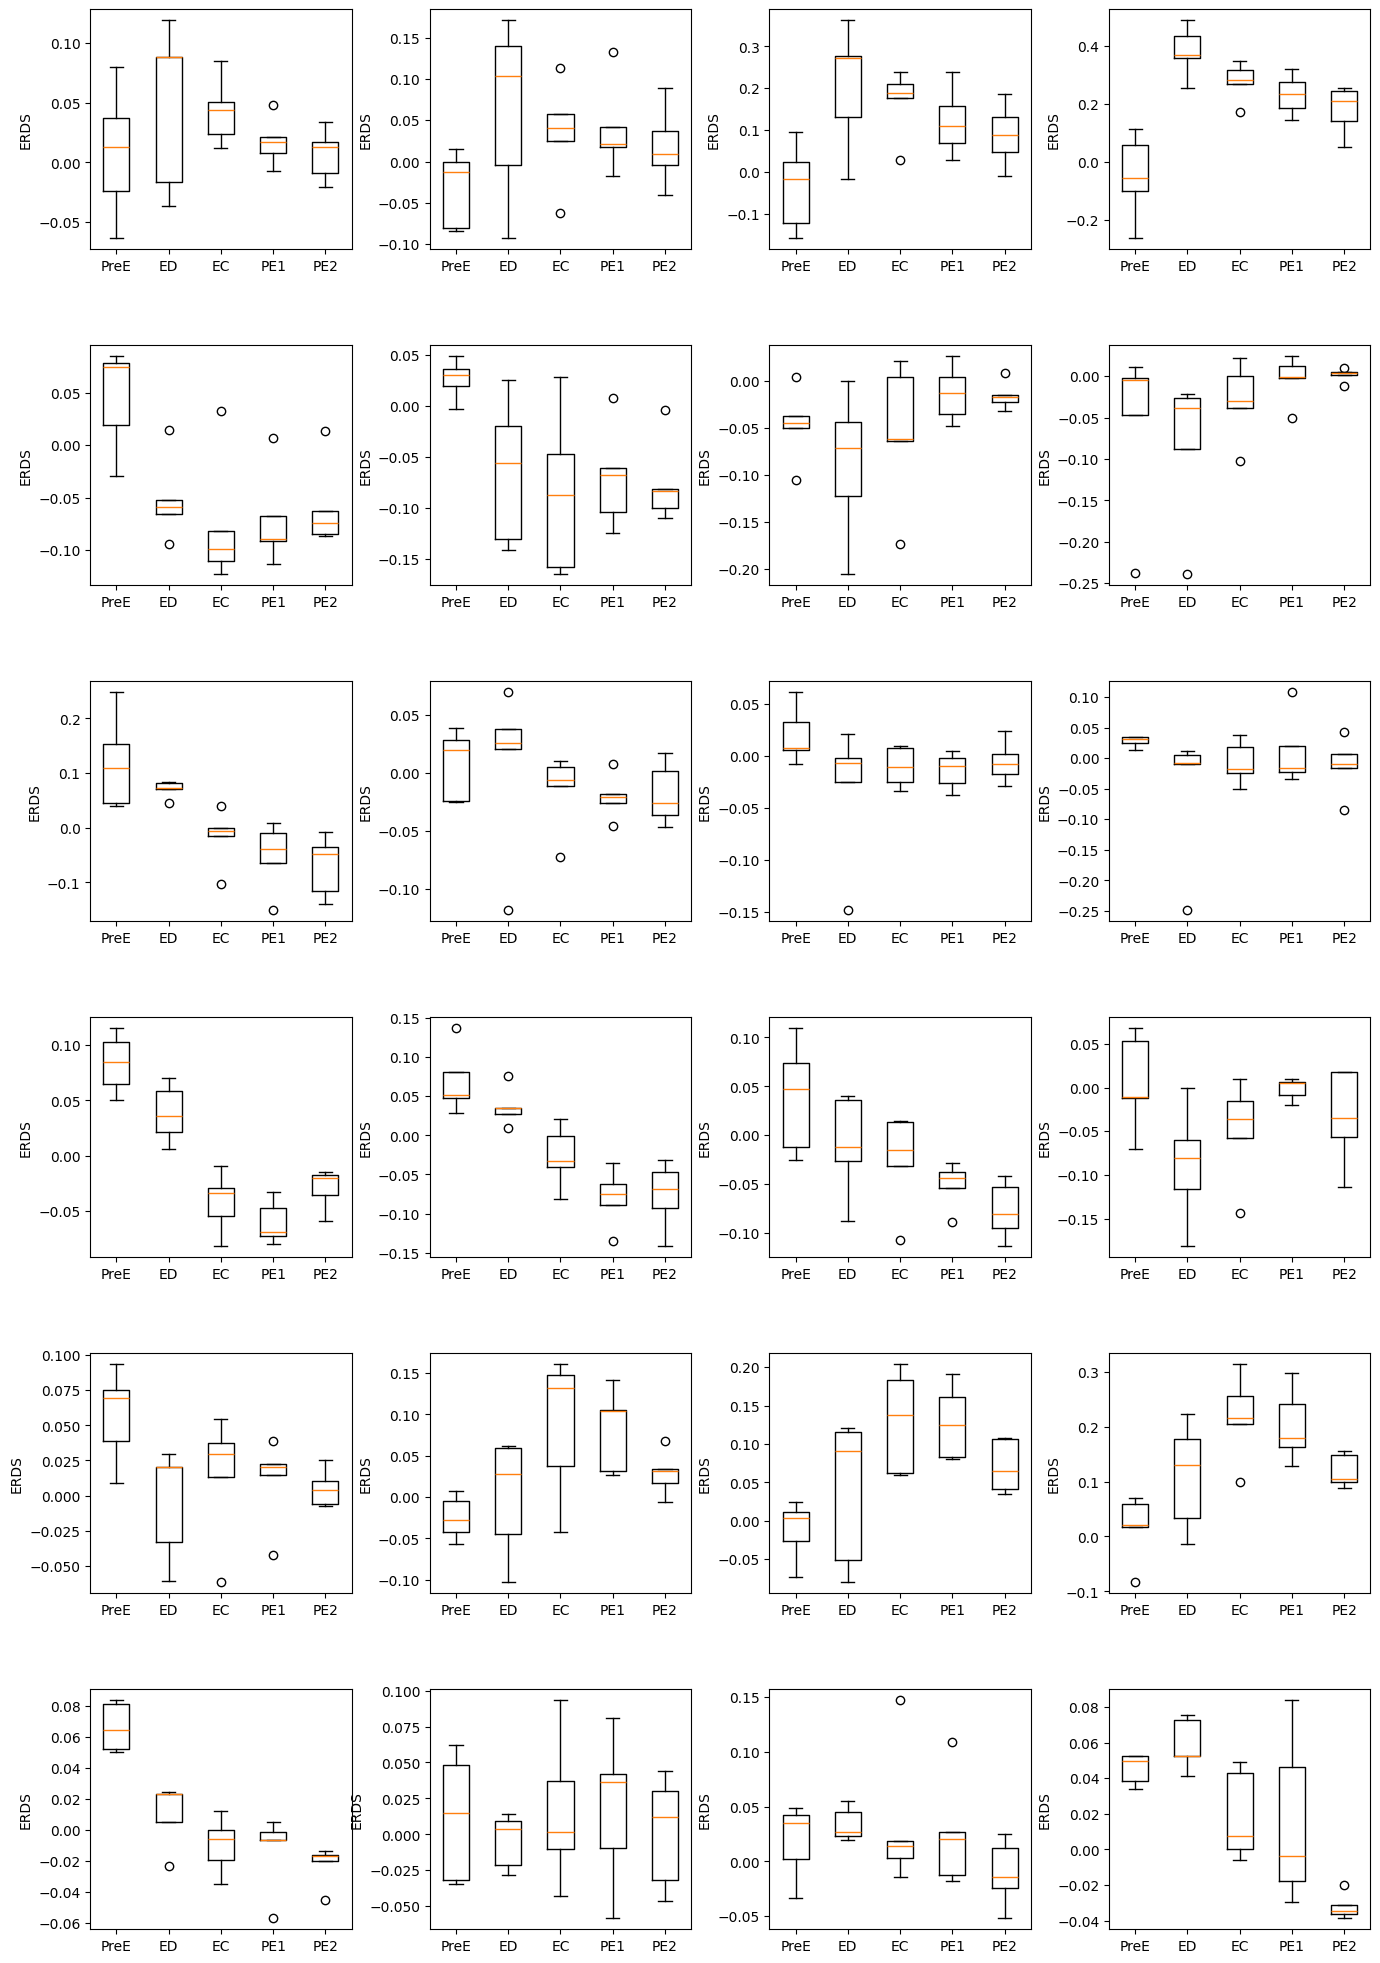

In [31]:
fig, axes = plt.subplots(6,4, figsize=(16,24))


for j, (ax_row, sub) in enumerate(zip(axes, subj_list)):
    for i, (fb, ax) in enumerate(zip(freq_band,ax_row)):
        ax.boxplot([ERDS_all[j,i,:,0],ERDS_all[j,i,:,1],ERDS_all[j,i,:,2],ERDS_all[j,i,:,3],ERDS_all[j,i,:,4]])
        ax.set_xticklabels(phase)
        ax.set_ylabel('ERDS')
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()
        

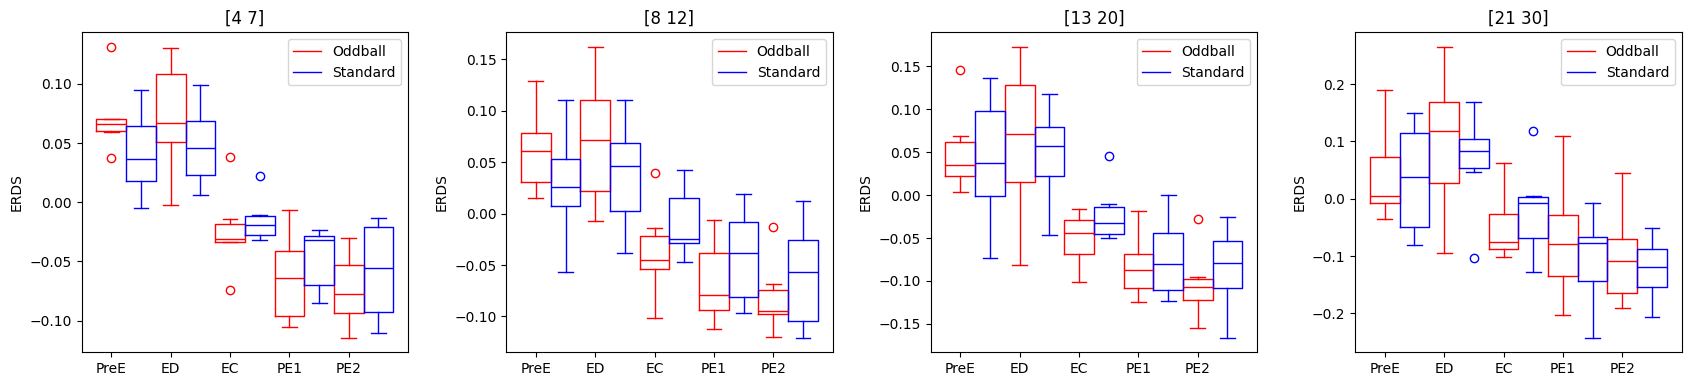

In [33]:
#DBS ERDS box plots

stg = ['explant'] #'implant','explant'
subj_list = [7, 8, 11, 13, 14, 15]
conditions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']

ERDS_all = []
for st in stg:
    for sub in subj_list:
        ERDS_all2 = []
        if sub == 7 or sub == 8:
            eeg_chs = ['DBS1-2', 'DBS1-3', 'DBS1-4', 'DBS2-5', 'DBS3-6', 'DBS4-7', 'DBS5-8', 'DBS6-8', 'DBS7-8']

        else:
            eeg_chs = ['DBS1-2', 'DBS2-3', 'DBS3-4', 'DBS4-5', 'DBS5-6', 'DBS6-7', 'DBS7-8']
        
        for cond in condtions:
            ERDS_all3 = []
            
            for fb, ax in zip(freq_band,axes):
                ERDS_all1=[]
                for eeg_ch in eeg_chs:
                    
                    #print(eeg_ch)
                    coh1 = coh_sub[coh_sub["Stage"]==st]
                    coh2 = coh1[coh1["Subject"]==sub]
                    coh3 = coh2[coh2["Condition"]==cond]
                    coh4 = coh3[coh3["Freq"]==fb]
                    coh5 = coh4[coh4["Channel"]==eeg_ch]
                    ERDS_all1.append(coh5.ERDS)
                ERDS_all11 = list(np.array(ERDS_all1).mean(axis=0))
              
                    
                ERDS_all3.append(ERDS_all11)
            ERDS_all2.append(ERDS_all3)
        ERDS_all.append(ERDS_all2)
ERDS_all = np.array(ERDS_all)
ERDS_all_subs = np.rollaxis(ERDS_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([ERDS_all_subs[i,:,0,0],
                ERDS_all_subs[i,:,0,1],
                ERDS_all_subs[i,:,0,2],
                ERDS_all_subs[i,:,0,3],
                ERDS_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)
            
    c2 = 'blue'
        
    box2 = ax.boxplot([ERDS_all_subs[i,:,1,0],
                ERDS_all_subs[i,:,1,1],
                ERDS_all_subs[i,:,1,2],
                ERDS_all_subs[i,:,1,3],
                ERDS_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        
        
    
    ax.set_ylabel('ERDS')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))

    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()
        

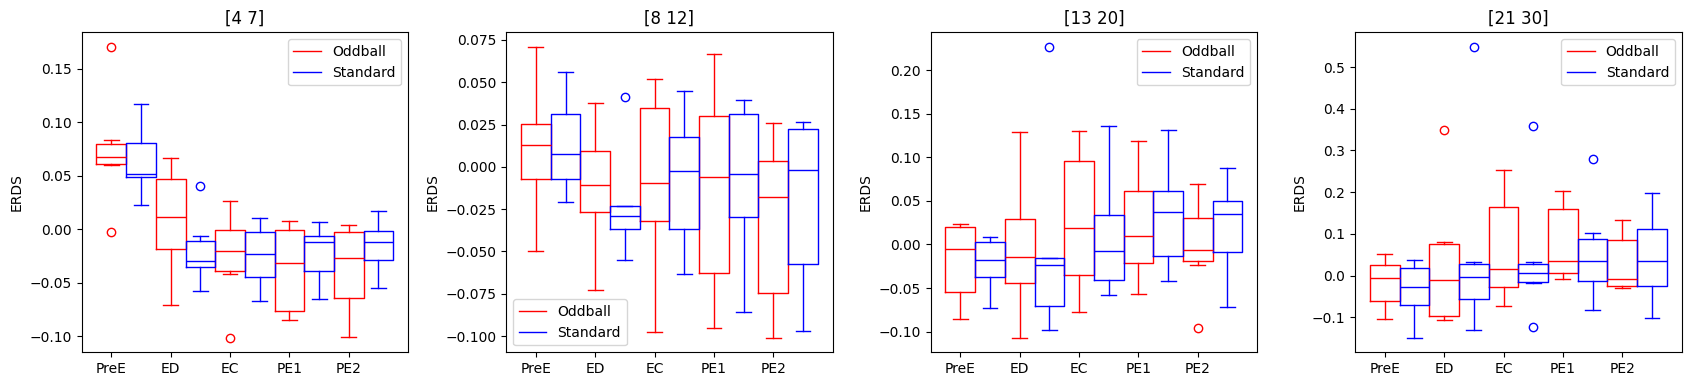

In [34]:
# EEG ERDS boxplots

stg = ['explant'] #'implant','explant'
subj_list = [7, 8, 11, 13, 14, 15]
conditions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
eeg_chs = ['CP2','FC2','C4'] #,'CP6', 'FC2', 'FC6', 'F4', 'F8', 'FC2', 'FC6', 'P4'

ERDS_all = []
for st in stg:
    for sub in subj_list:
        ERDS_all2 = []
        for cond in conditions:
            ERDS_all3 = []
            
            for fb, ax in zip(freq_band,axes):
                ERDS_all1=[]
                for eeg_ch in eeg_chs:
                    coh1 = coh_sub[coh_sub["Stage"]==st]
                    coh2 = coh1[coh1["Subject"]==sub]
                    coh3 = coh2[coh2["Condition"]==cond]
                    coh4 = coh3[coh3["Freq"]==fb]
                    coh5 = coh4[coh4["Channel"]==eeg_ch]
                    
                    ERDS_all1.append(np.array(coh5.ERDS))
                    
                ERDS_all11 = list(np.array(ERDS_all1).mean(axis=0))
                  
                ERDS_all3.append(ERDS_all11)
            ERDS_all2.append(ERDS_all3)
        ERDS_all.append(ERDS_all2)
ERDS_all = np.array(ERDS_all)
ERDS_all_subs = np.rollaxis(ERDS_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([ERDS_all_subs[i,:,0,0],
                ERDS_all_subs[i,:,0,1],
                ERDS_all_subs[i,:,0,2],
                ERDS_all_subs[i,:,0,3],
                ERDS_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)
            
    c2 = 'blue'
        
    box2 = ax.boxplot([ERDS_all_subs[i,:,1,0],
                ERDS_all_subs[i,:,1,1],
                ERDS_all_subs[i,:,1,2],
                ERDS_all_subs[i,:,1,3],
                ERDS_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        
        
    
    ax.set_ylabel('ERDS')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))

    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()
        

# Responders vs Non Responders

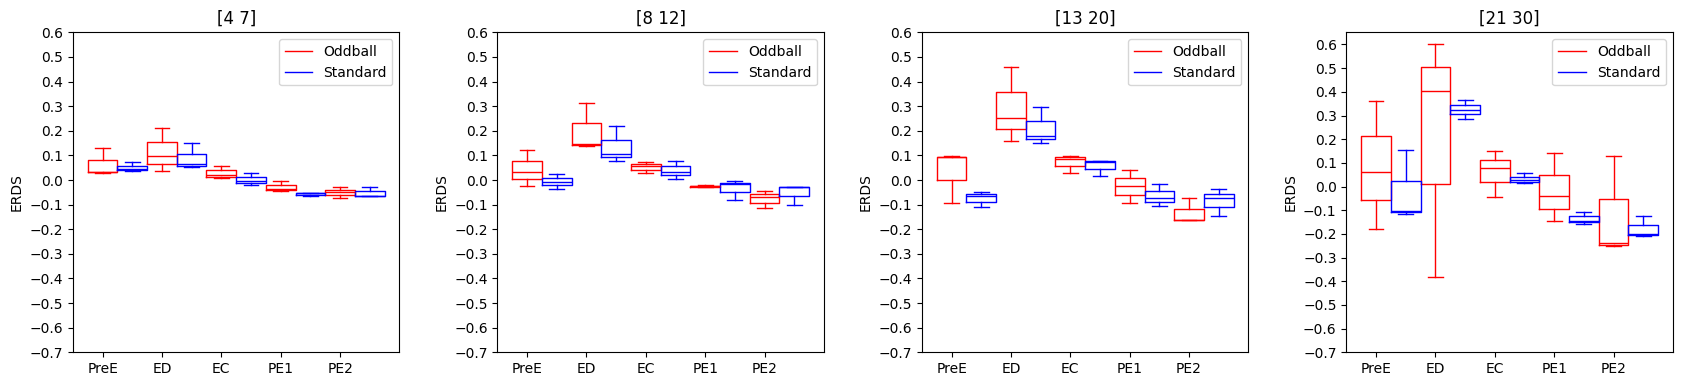

In [37]:
#DBS ERDS box plots
#Responders

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
condtions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
subj_list_r_imp = [7, 8, 11]


ERDS_all = []
for st in stg:
    for sub in subj_list:
        ERDS_all2 = []
        if st == "implant" and sub in subj_list_r_imp or st == "explant" and sub == 13:

            if sub == 7 or sub == 8:
                eeg_chs = ['DBS1-2', 'DBS1-3', 'DBS1-4', 'DBS2-5', 'DBS3-6', 'DBS4-7', 'DBS5-8', 'DBS6-8', 'DBS7-8']

            else:
                eeg_chs = ['DBS1-2', 'DBS2-3', 'DBS3-4', 'DBS4-5', 'DBS5-6', 'DBS6-7', 'DBS7-8']

            for cond in condtions:
                ERDS_all3 = []

                for fb, ax in zip(freq_band,axes):
                    ERDS_all1=[]
                    for eeg_ch in eeg_chs:

                        #print(eeg_ch)
                        coh1 = coh_sub[coh_sub["Stage"]==st]
                        coh2 = coh1[coh1["Subject"]==sub]
                        coh3 = coh2[coh2["Condition"]==cond]
                        coh4 = coh3[coh3["Freq"]==fb]
                        coh5 = coh4[coh4["Channel"]==eeg_ch]
                        ERDS_all1.append(coh5.ERDS)
                    ERDS_all11 = list(np.array(ERDS_all1).mean(axis=0))


                    ERDS_all3.append(ERDS_all11)
                ERDS_all2.append(ERDS_all3)
            ERDS_all.append(ERDS_all2)
ERDS_all = np.array(ERDS_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
ERDS_all_subs = np.rollaxis(ERDS_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([ERDS_all_subs[i,:,0,0],
                ERDS_all_subs[i,:,0,1],
                ERDS_all_subs[i,:,0,2],
                ERDS_all_subs[i,:,0,3],
                ERDS_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([ERDS_all_subs[i,:,1,0],
                ERDS_all_subs[i,:,1,1],
                ERDS_all_subs[i,:,1,2],
                ERDS_all_subs[i,:,1,3],
                ERDS_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('ERDS')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0.7,0.7,0.1)
    ax.set_yticks(yticks)

    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


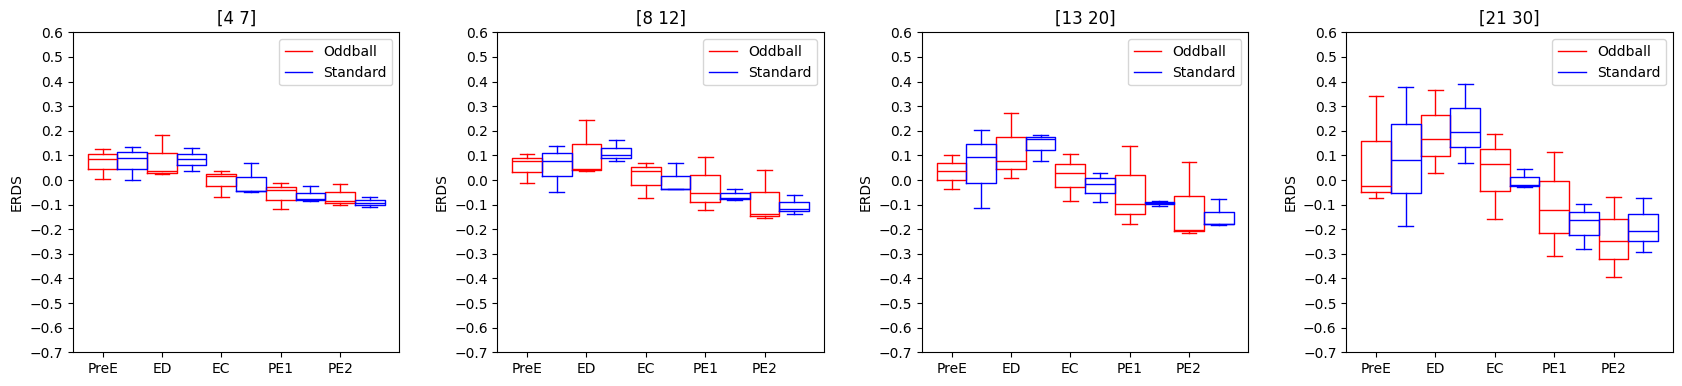

In [38]:
# DBS ERDS box plots
# Non Responders
stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
condtions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
subj_list_nr_imp = [13, 14, 15]
subj_list_nr_exp = [7,8,11,14, 15]


ERDS_all = []
for st in stg:
    for sub in subj_list:
        ERDS_all2 = []
        if st == "implant" and sub in subj_list_nr_imp or st == "explant" and sub in subj_list_nr_exp:

            if sub == 7 or sub == 8:
                eeg_chs = ['DBS1-2', 'DBS1-3', 'DBS1-4', 'DBS2-5', 'DBS3-6', 'DBS4-7', 'DBS5-8', 'DBS6-8', 'DBS7-8']

            else:
                eeg_chs = ['DBS1-2', 'DBS2-3', 'DBS3-4', 'DBS4-5', 'DBS5-6', 'DBS6-7', 'DBS7-8']

            for cond in condtions:
                ERDS_all3 = []

                for fb, ax in zip(freq_band,axes):
                    ERDS_all1=[]
                    for eeg_ch in eeg_chs:

                        #print(eeg_ch)
                        coh1 = coh_sub[coh_sub["Stage"]==st]
                        coh2 = coh1[coh1["Subject"]==sub]
                        coh3 = coh2[coh2["Condition"]==cond]
                        coh4 = coh3[coh3["Freq"]==fb]
                        coh5 = coh4[coh4["Channel"]==eeg_ch]
                        ERDS_all1.append(coh5.ERDS)
                    ERDS_all11 = list(np.array(ERDS_all1).mean(axis=0))


                    ERDS_all3.append(ERDS_all11)
                ERDS_all2.append(ERDS_all3)
            ERDS_all.append(ERDS_all2)
ERDS_all = np.array(ERDS_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
ERDS_all_subs = np.rollaxis(ERDS_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([ERDS_all_subs[i,:,0,0],
                ERDS_all_subs[i,:,0,1],
                ERDS_all_subs[i,:,0,2],
                ERDS_all_subs[i,:,0,3],
                ERDS_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([ERDS_all_subs[i,:,1,0],
                ERDS_all_subs[i,:,1,1],
                ERDS_all_subs[i,:,1,2],
                ERDS_all_subs[i,:,1,3],
                ERDS_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('ERDS')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0.7,0.7,0.1)
    ax.set_yticks(yticks)
    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


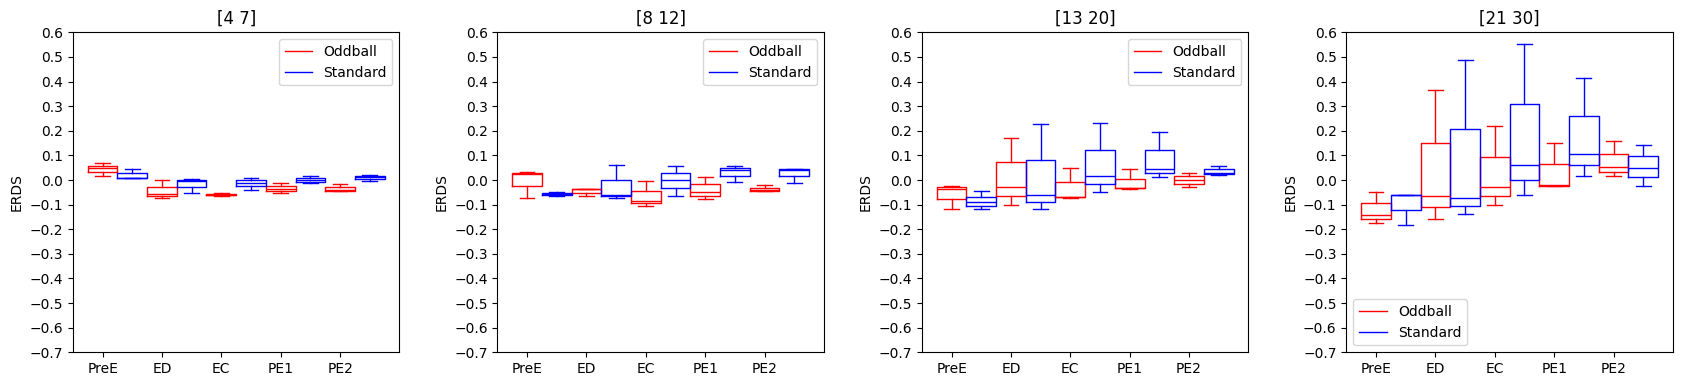

In [39]:
#EEG ERDS box plots
#Responders

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
condtions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
subj_list_r_imp = [7, 8, 11]
eeg_chs = ['CP2','FC2','C4'] #,'CP6', 'FC2', 'FC6', 'F4', 'F8', 'FC2', 'FC6', 'P4'


ERDS_all = []
for st in stg:
    for sub in subj_list:
        ERDS_all2 = []
        if st == "implant" and sub in subj_list_r_imp or st == "explant" and sub == 13:


            for cond in condtions:
                ERDS_all3 = []

                for fb, ax in zip(freq_band,axes):
                    ERDS_all1=[]
                    for eeg_ch in eeg_chs:

                        #print(eeg_ch)
                        coh1 = coh_sub[coh_sub["Stage"]==st]
                        coh2 = coh1[coh1["Subject"]==sub]
                        coh3 = coh2[coh2["Condition"]==cond]
                        coh4 = coh3[coh3["Freq"]==fb]
                        coh5 = coh4[coh4["Channel"]==eeg_ch]
                        ERDS_all1.append(coh5.ERDS)
                    ERDS_all11 = list(np.array(ERDS_all1).mean(axis=0))


                    ERDS_all3.append(ERDS_all11)
                ERDS_all2.append(ERDS_all3)
            ERDS_all.append(ERDS_all2)
ERDS_all = np.array(ERDS_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
ERDS_all_subs = np.rollaxis(ERDS_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([ERDS_all_subs[i,:,0,0],
                ERDS_all_subs[i,:,0,1],
                ERDS_all_subs[i,:,0,2],
                ERDS_all_subs[i,:,0,3],
                ERDS_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([ERDS_all_subs[i,:,1,0],
                ERDS_all_subs[i,:,1,1],
                ERDS_all_subs[i,:,1,2],
                ERDS_all_subs[i,:,1,3],
                ERDS_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('ERDS')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0.7,0.7,0.1)
    ax.set_yticks(yticks)
    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


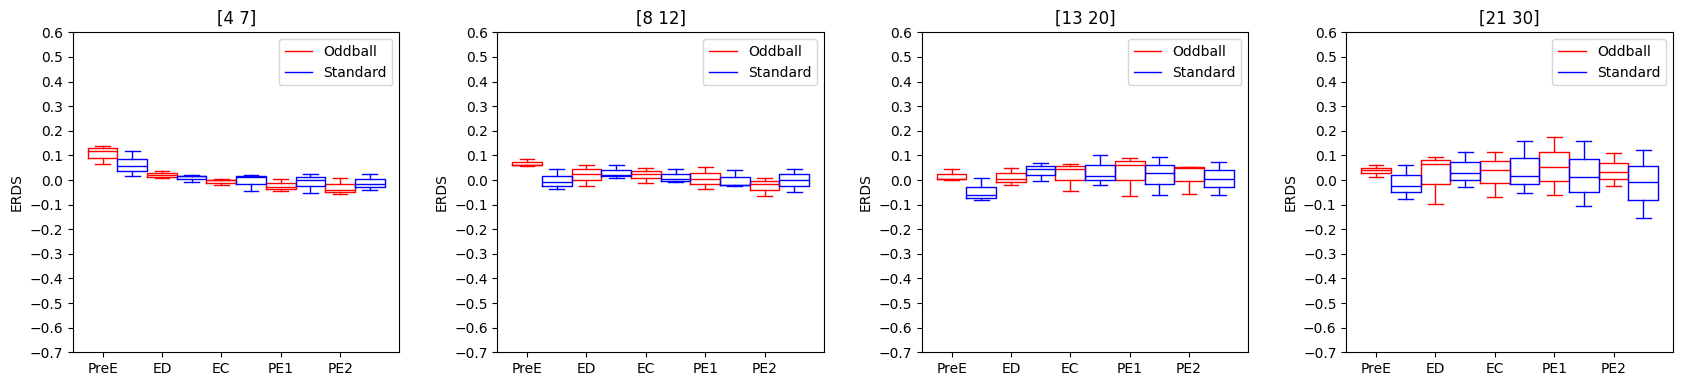

In [40]:
# EEG ERDS box plots
# Non Responders
stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
condtions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
subj_list_nr_imp = [13, 14, 15]
subj_list_nr_exp = [7,8,11,14, 15]
eeg_chs = ['CP2','FC2','C4'] #,'CP6', 'FC2', 'FC6', 'F4', 'F8', 'FC2', 'FC6', 'P4'


ERDS_all = []
for st in stg:
    for sub in subj_list:
        ERDS_all2 = []
        if st == "implant" and sub in subj_list_nr_imp or st == "explant" and sub in subj_list_nr_exp:

            for cond in condtions:
                ERDS_all3 = []

                for fb, ax in zip(freq_band,axes):
                    ERDS_all1=[]
                    for eeg_ch in eeg_chs:

                        #print(eeg_ch)
                        coh1 = coh_sub[coh_sub["Stage"]==st]
                        coh2 = coh1[coh1["Subject"]==sub]
                        coh3 = coh2[coh2["Condition"]==cond]
                        coh4 = coh3[coh3["Freq"]==fb]
                        coh5 = coh4[coh4["Channel"]==eeg_ch]
                        ERDS_all1.append(coh5.ERDS)
                    ERDS_all11 = list(np.array(ERDS_all1).mean(axis=0))


                    ERDS_all3.append(ERDS_all11)
                ERDS_all2.append(ERDS_all3)
            ERDS_all.append(ERDS_all2)
ERDS_all = np.array(ERDS_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
ERDS_all_subs = np.rollaxis(ERDS_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([ERDS_all_subs[i,:,0,0],
                ERDS_all_subs[i,:,0,1],
                ERDS_all_subs[i,:,0,2],
                ERDS_all_subs[i,:,0,3],
                ERDS_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([ERDS_all_subs[i,:,1,0],
                ERDS_all_subs[i,:,1,1],
                ERDS_all_subs[i,:,1,2],
                ERDS_all_subs[i,:,1,3],
                ERDS_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('ERDS')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0.7,0.7,0.1)
    ax.set_yticks(yticks)
    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


# CCC plots for responders and non responders

(40, 1801)
(40, 1801)
(40, 1801)


([<matplotlib.axis.YTick at 0x2e5dbbf5b10>,
 [Text(0, -0.01, '−0.01'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.01, '0.01'),
  Text(0, 0.019999999999999997, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.049999999999999996, '0.05')])

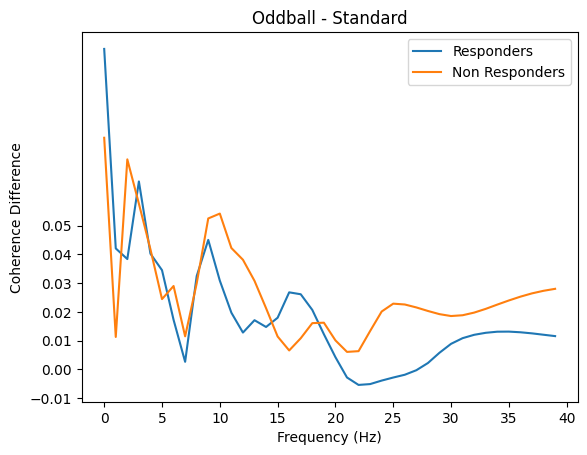

In [48]:
base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
subj_list = ['007', '008', '011' ,'013', '014', '015']
subj_list_r_imp = ['007', '008', '011']

subj_list_nr_imp = ['013', '014', '015']
subj_list_nr_exp = ['007', '008', '011', '014', '015']


ccc_all_r = []
ccc_all_nr = []
for st in stg:
    for sub in subj_list:
        if st == "implant" and sub in subj_list_r_imp or st == "explant" and sub == '013':

            file = f"{base_dir}CCC_{sub}_{st}.npy"
            ccc = np.load(file)
            print(ccc.shape)
            ccc_all_r.append(ccc)
            
        else:
            file = f"{base_dir}CCC_{sub}_{st}.npy"
            ccc = np.load(file)
            #print(ccc.shape)
            ccc_all_nr.append(ccc)            
ccc_all_r = np.array(ccc_all_r)
ccc_all_nr = np.array(ccc_all_nr)

tmin = 600
tmax = 900
plt.plot(ccc_all_r.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(ccc_all_nr.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.legend(['Responders', 'Non Responders'])
plt.ylabel("Coherence Difference")
plt.xlabel("Frequency (Hz)")
plt.title("Oddball - Standard")
yticks = np.arange(-0.01,0.06, 0.01)
plt.yticks(yticks)

# CCC plots for implant vs explant

(40, 1801)
(40, 1801)
(40, 1801)
(40, 1801)
(40, 1801)
(40, 1801)


([<matplotlib.axis.YTick at 0x2e5e1c03f40>,
 [Text(0, -0.01, '−0.01'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.01, '0.01'),
  Text(0, 0.019999999999999997, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.049999999999999996, '0.05')])

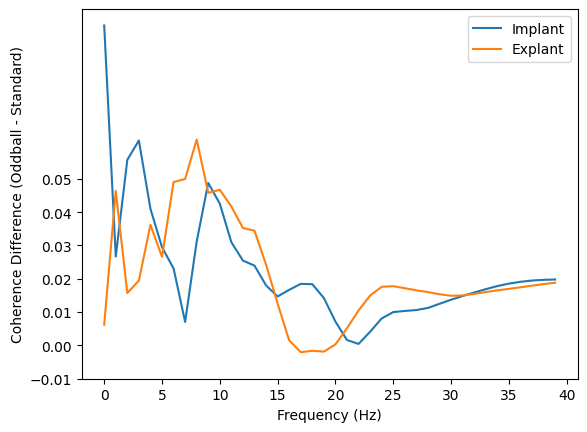

In [46]:
base_dir = "E:/Oddball Data/"

stg = ['implant','explant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
subj_list = ['007', '008', '011' ,'013', '014', '015']
subj_list_r_imp = ['007', '008', '011']

subj_list_nr_imp = ['013', '014', '015']
subj_list_nr_exp = ['007', '008', '011', '014', '015']


ccc_all_imp = []
ccc_all_exp = []
for st in stg:
    for sub in subj_list:
        if st == "implant":

            file = f"{base_dir}CCC_{sub}_{st}.npy"
            ccc = np.load(file)
            print(ccc.shape)
            ccc_all_imp.append(ccc)
            
        else:
            file = f"{base_dir}CCC_{sub}_{st}.npy"
            ccc = np.load(file)
            #print(ccc.shape)
            ccc_all_exp.append(ccc)            
ccc_all_imp = np.array(ccc_all_imp)
ccc_all_exp = np.array(ccc_all_exp)

tmin = 600
tmax = 900
plt.plot(ccc_all_imp.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(ccc_all_exp.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.legend(['Implant', 'Explant'])
plt.ylabel("Coherence Difference (Oddball - Standard)")
plt.xlabel("Frequency (Hz)")
yticks = np.arange(-0.01,0.06, 0.01)
plt.yticks(yticks)

(40, 1801)


Text(0.5, 1.0, 'Responders')

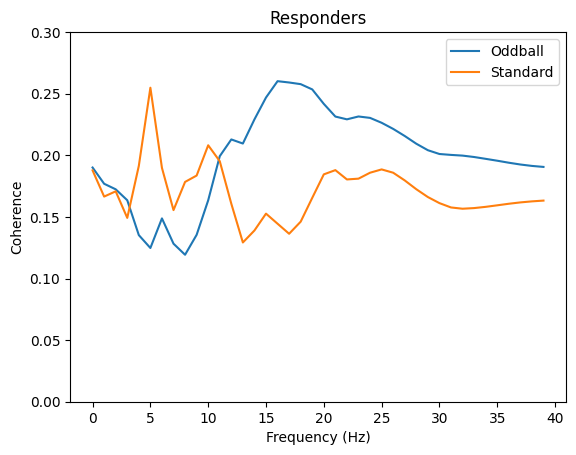

In [71]:
base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
subj_list = ['007']
subj_list_r_imp = ['007', '008', '011']

subj_list_nr_imp = ['013', '014', '015']
subj_list_nr_exp = ['007', '008', '011', '014', '015']


ccc_all_odd = []
ccc_all_typ = []
for st in stg:
    for sub in subj_list:
        if st == "implant" and sub in subj_list_r_imp or st == "explant" and sub == '013':

            file = f"{base_dir}CCC_Oddball_{sub}_{st}.npy"
            ccc_odd = np.load(file)
            print(ccc_odd.shape)
            ccc_all_odd.append(ccc_odd)
            
            file = f"{base_dir}CCC_Standard_{sub}_{st}.npy"
            ccc_typ = np.load(file)
            #print(ccc.shape)
            ccc_all_typ.append(ccc_typ)            
ccc_all_odd = np.array(ccc_all_odd)
ccc_all_typ = np.array(ccc_all_typ)

tmin = 600
tmax = 900
plt.plot(ccc_all_odd.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(ccc_all_typ.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.legend(['Oddball', 'Standard'])
plt.ylabel("Coherence")
plt.xlabel("Frequency (Hz)")
plt.ylim(0,0.3)
plt.title('Responders')


(0.0, 0.3)

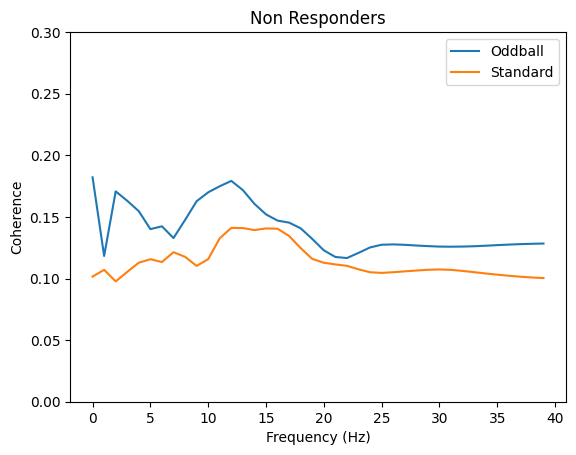

In [72]:
base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
subj_list = ['007', '008', '011' ,'013', '014', '015']
subj_list_r_imp = ['007', '008', '011']

subj_list_nr_imp = ['013', '014', '015']
subj_list_nr_exp = ['007', '008', '011', '014', '015']


ccc_all_odd = []
ccc_all_typ = []
for st in stg:
    for sub in subj_list:
        if st == "implant" and sub not in subj_list_r_imp or st == "explant" and sub != '013':

            file = f"{base_dir}CCC_Oddball_{sub}_{st}.npy"
            ccc_odd = np.load(file)
            #print(ccc_odd)
            ccc_all_odd.append(ccc_odd)
            
            file = f"{base_dir}CCC_Standard_{sub}_{st}.npy"
            ccc_typ = np.load(file)
            #print(ccc)
            ccc_all_typ.append(ccc_typ)            
ccc_all_odd = np.array(ccc_all_odd)
ccc_all_typ = np.array(ccc_all_typ)

tmin = 600
tmax = 900
plt.plot(ccc_all_odd.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(ccc_all_typ.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.legend(['Oddball', 'Standard'])
plt.ylabel("Coherence")
plt.xlabel("Frequency (Hz)")
plt.title('Non Responders')
plt.ylim(0,0.3)


# GC plots for responders and non responders


(40, 1801)
(40, 1801)
(40, 1801)
(40, 1801)
(40, 1801)
(40, 1801)


Text(0.5, 1.0, 'Responders')

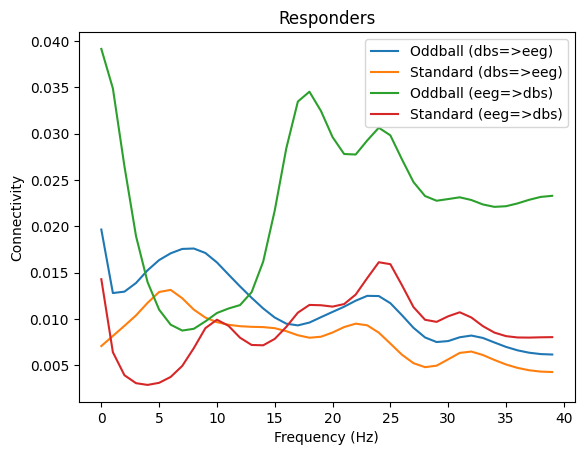

In [76]:
# DBS => EEG


base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
subj_list = ['007', '008', '011' ,'013', '014', '015']

subj_list_r_imp = ['007', '008', '011']

subj_list_nr_imp = ['013', '014', '015']
subj_list_nr_exp = ['007', '008', '011', '014', '015']


gc_all_odd_dbs_eeg = []
gc_all_typ_dbs_eeg = []
gc_all_odd_eeg_dbs = []
gc_all_typ_eeg_dbs = []


for st in stg:
    for sub in subj_list:
        if st == "implant" and sub in subj_list_r_imp or st == "explant" and sub == '013':

            file = f"{base_dir}GC_dbs_eeg_Oddball_{sub}_{st}.npy"
            gc_odd_dbs_eeg = np.load(file)
            print(gc_odd_dbs_eeg.shape)
            gc_all_odd_dbs_eeg.append(gc_odd_dbs_eeg)
            
            file = f"{base_dir}GC_dbs_eeg_Standard_{sub}_{st}.npy"
            gc_typ_dbs_eeg = np.load(file)
            #print(ccc.shape)
            gc_all_typ_dbs_eeg.append(gc_typ_dbs_eeg) 
            
            file = f"{base_dir}GC_eeg_dbs_Oddball_{sub}_{st}.npy"
            gc_odd_eeg_dbs = np.load(file)
            print(gc_odd_eeg_dbs.shape)
            gc_all_odd_eeg_dbs.append(gc_odd_eeg_dbs)
            
            file = f"{base_dir}GC_eeg_dbs_Standard_{sub}_{st}.npy"
            gc_typ_eeg_dbs = np.load(file)
            #print(ccc.shape)
            gc_all_typ_eeg_dbs.append(gc_typ_eeg_dbs)             
 
          
            
gc_all_odd_dbs_eeg = np.array(gc_all_odd_dbs_eeg)
gc_all_typ_dbs_eeg = np.array(gc_all_typ_dbs_eeg)
gc_all_odd_eeg_dbs = np.array(gc_all_odd_eeg_dbs)
gc_all_typ_eeg_dbs = np.array(gc_all_typ_eeg_dbs)

tmin = 600
tmax = 900

plt.plot(gc_all_odd_dbs_eeg.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(gc_all_typ_dbs_eeg.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(gc_all_odd_eeg_dbs.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(gc_all_typ_eeg_dbs.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.legend(['Oddball (dbs=>eeg)', 'Standard (dbs=>eeg)', 'Oddball (eeg=>dbs)', 'Standard (eeg=>dbs)'])
plt.ylabel("Connectivity")
plt.xlabel("Frequency (Hz)")
plt.title('Responders')


(40, 1801)
(40, 1801)
(40, 1801)
(40, 1801)
(40, 1801)
(40, 1801)


Text(0.5, 1.0, 'Non Responders')

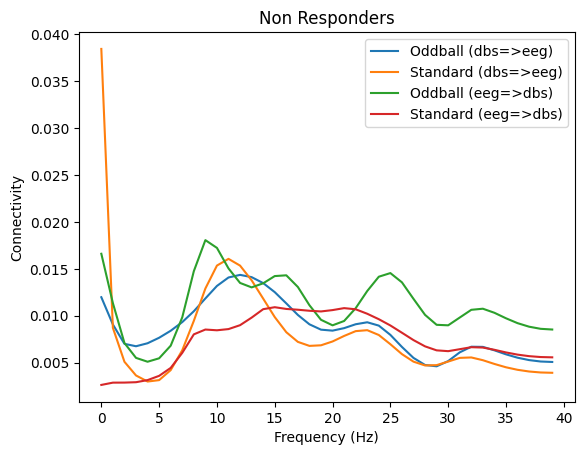

In [77]:
# DBS => EEG

base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
subj_list = ['007', '008', '011' ,'013', '014', '015']

subj_list_r_imp = ['007', '008', '011']

subj_list_nr_imp = ['013', '014', '015']
subj_list_nr_exp = ['007', '008', '011', '014', '015']


gc_all_odd_dbs_eeg = []
gc_all_typ_dbs_eeg = []
gc_all_odd_eeg_dbs = []
gc_all_typ_eeg_dbs = []


for st in stg:
    for sub in subj_list:
        if st == "implant" and sub not in subj_list_r_imp or st == "explant" and sub != '013':

            file = f"{base_dir}GC_dbs_eeg_Oddball_{sub}_{st}.npy"
            gc_odd_dbs_eeg = np.load(file)
            print(gc_odd_dbs_eeg.shape)
            gc_all_odd_dbs_eeg.append(gc_odd_dbs_eeg)
            
            file = f"{base_dir}GC_dbs_eeg_Standard_{sub}_{st}.npy"
            gc_typ_dbs_eeg = np.load(file)
            #print(ccc.shape)
            gc_all_typ_dbs_eeg.append(gc_typ_dbs_eeg) 
            
            file = f"{base_dir}GC_eeg_dbs_Oddball_{sub}_{st}.npy"
            gc_odd_eeg_dbs = np.load(file)
            print(gc_odd_eeg_dbs.shape)
            gc_all_odd_eeg_dbs.append(gc_odd_eeg_dbs)
            
            file = f"{base_dir}GC_eeg_dbs_Standard_{sub}_{st}.npy"
            gc_typ_eeg_dbs = np.load(file)
            #print(ccc.shape)
            gc_all_typ_eeg_dbs.append(gc_typ_eeg_dbs)             
 
          
            
gc_all_odd_dbs_eeg = np.array(gc_all_odd_dbs_eeg)
gc_all_typ_dbs_eeg = np.array(gc_all_typ_dbs_eeg)
gc_all_odd_eeg_dbs = np.array(gc_all_odd_eeg_dbs)
gc_all_typ_eeg_dbs = np.array(gc_all_typ_eeg_dbs)

tmin = 600
tmax = 900

plt.plot(gc_all_odd_dbs_eeg.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(gc_all_typ_dbs_eeg.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(gc_all_odd_eeg_dbs.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.plot(gc_all_typ_eeg_dbs.mean(axis = 0)[:,600:900].mean(axis = 1))
plt.legend(['Oddball (dbs=>eeg)', 'Standard (dbs=>eeg)', 'Oddball (eeg=>dbs)', 'Standard (eeg=>dbs)'])
plt.ylabel("Connectivity")
plt.xlabel("Frequency (Hz)")
plt.title('Non Responders')


In [78]:
coh = pd.read_csv(base_dir+'Oddball_Coh_data.csv')
coh_sub = (
    coh.groupby(["Stage","Subject","Condition","Time", "Freq", "DBS" ], observed=False)[["CCC"]].mean().reset_index()
)

In [79]:
coh_sub

,Stage,Subject,Condition,Time,Freq,DBS,CCC
0,explant,7,Oddball,[-0.5 0],[13 20],['DBS1-3'],0.125652
1,explant,7,Oddball,[-0.5 0],[21 30],['DBS1-3'],0.122591
2,explant,7,Oddball,[-0.5 0],[4 7],['DBS1-3'],0.177915
3,explant,7,Oddball,[-0.5 0],[8 12],['DBS1-3'],0.118923
4,explant,7,Oddball,[0 0.875 ],[13 20],['DBS1-3'],0.119295
...,...,...,...,...,...,...,...
475,implant,15,Standard,"[1.1, 1.5]",[8 12],['DBS6-7'],0.182402
476,implant,15,Standard,[1.5 2],[13 20],['DBS6-7'],0.223587
477,implant,15,Standard,[1.5 2],[21 30],['DBS6-7'],0.124674
478,implant,15,Standard,[1.5 2],[4 7],['DBS6-7'],0.186661


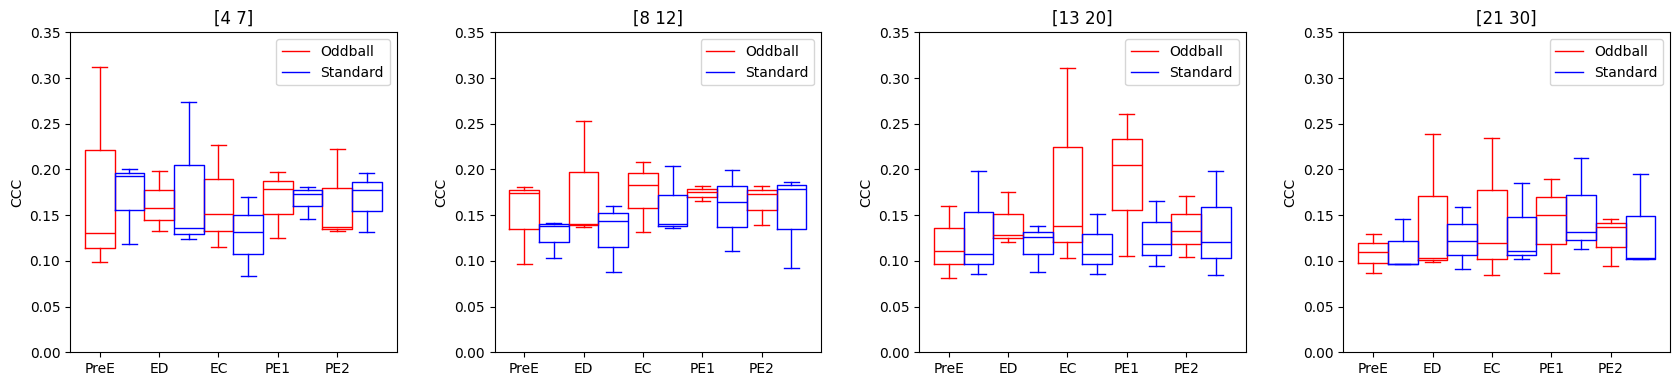

In [91]:
#CCC box plots
#Responders

base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
#subj_list = ['007', '008', '011' ,'013', '014', '015']
subj_list_r_imp = [7, 8, 11]

subj_list_nr_imp = [13, 14, 15]
subj_list_nr_exp = [7, 8, 11, 14, 15]
conditions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
phase = ['PreE', 'ED', 'EC', 'PE1', 'PE2']


CCC_all = []
for st in stg:
    for sub in subj_list:
        CCC_all2 = []
        if st == "implant" and sub in subj_list_r_imp or st == "explant" and sub == 13:

            for cond in conditions:
                CCC_all3 = []

                for fb, ax in zip(freq_band,axes):
                    CCC_all1=[]

                    coh1 = coh_sub[coh_sub["Stage"]==st]
                    coh2 = coh1[coh1["Subject"]==sub]
                    coh3 = coh2[coh2["Condition"]==cond]
                    coh4 = coh3[coh3["Freq"]==fb]
                    coh5 = coh4[coh4["DBS"]==np.array(coh4["DBS"])[0]]
                    #print(np.array(coh4["DBS"])[0])
                    CCC_all1.append(coh5.CCC)
                    CCC_all11 = list(np.array(CCC_all1).mean(axis=0))


                    CCC_all3.append(CCC_all11)
                CCC_all2.append(CCC_all3)
            CCC_all.append(CCC_all2)
CCC_all = np.array(CCC_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
CCC_all_subs = np.rollaxis(CCC_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([CCC_all_subs[i,:,0,0],
                CCC_all_subs[i,:,0,1],
                CCC_all_subs[i,:,0,2],
                CCC_all_subs[i,:,0,3],
                CCC_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([CCC_all_subs[i,:,1,0],
                CCC_all_subs[i,:,1,1],
                CCC_all_subs[i,:,1,2],
                CCC_all_subs[i,:,1,3],
                CCC_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('CCC')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0,0.4,0.05)
    ax.set_yticks(yticks)

    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


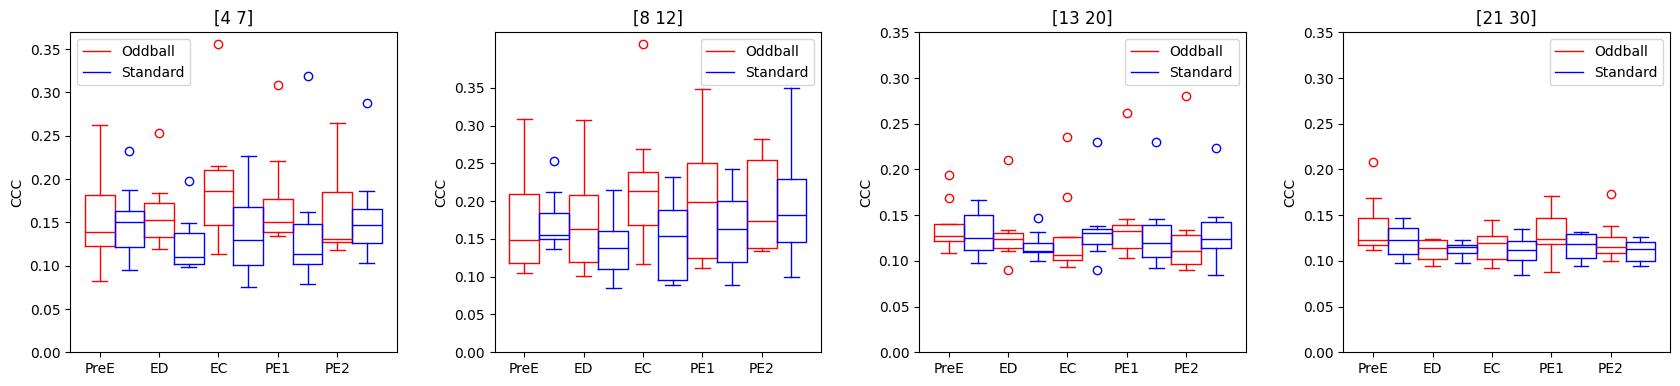

In [99]:
#CCC box plots
#Non Responders

base_dir = "E:/Oddball Data/"

stg = ['implant','explant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
#subj_list = ['007', '008', '011' ,'013', '014', '015']
subj_list_r_imp = [7, 8, 11]

subj_list_nr_imp = [13, 14, 15]
subj_list_nr_exp = [7, 8, 11, 14, 15]
conditions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
phase = ['PreE', 'ED', 'EC', 'PE1', 'PE2']


CCC_all = []
for st in stg:
    for sub in subj_list:
        CCC_all2 = []
        if st == "implant" and sub not in subj_list_r_imp or st == "explant" and sub != 13:

            for cond in conditions:
                CCC_all3 = []

                for fb, ax in zip(freq_band,axes):
                    CCC_all1=[]

                    coh1 = coh_sub[coh_sub["Stage"]==st]
                    coh2 = coh1[coh1["Subject"]==sub]
                    coh3 = coh2[coh2["Condition"]==cond]
                    coh4 = coh3[coh3["Freq"]==fb]
                    coh5 = coh4[coh4["DBS"]==np.array(coh4["DBS"])[0]]
                    #print(np.array(coh4["DBS"])[0])
                    CCC_all1.append(coh5.CCC)
                    CCC_all11 = list(np.array(CCC_all1).mean(axis=0))


                    CCC_all3.append(CCC_all11)
                CCC_all2.append(CCC_all3)
            CCC_all.append(CCC_all2)
CCC_all = np.array(CCC_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
CCC_all_subs = np.rollaxis(CCC_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([CCC_all_subs[i,:,0,0],
                CCC_all_subs[i,:,0,1],
                CCC_all_subs[i,:,0,2],
                CCC_all_subs[i,:,0,3],
                CCC_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([CCC_all_subs[i,:,1,0],
                CCC_all_subs[i,:,1,1],
                CCC_all_subs[i,:,1,2],
                CCC_all_subs[i,:,1,3],
                CCC_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('CCC')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0,0.4,0.05)
    ax.set_yticks(yticks)

    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


In [83]:
gc = pd.read_csv(base_dir+'Oddball_GC_data.csv')
gc_sub = (
    gc.groupby(["Stage","Subject","Condition","Time", "Freq", "DBS","Direction"], observed=False)[["GC"]].mean().reset_index()
)
gc_sub_dbs_eeg = gc_sub[gc_sub["Direction"]=="DBS=> EEG"]
gc_sub_eeg_dbs = gc_sub[gc_sub["Direction"]=="EEG=> DBS"]

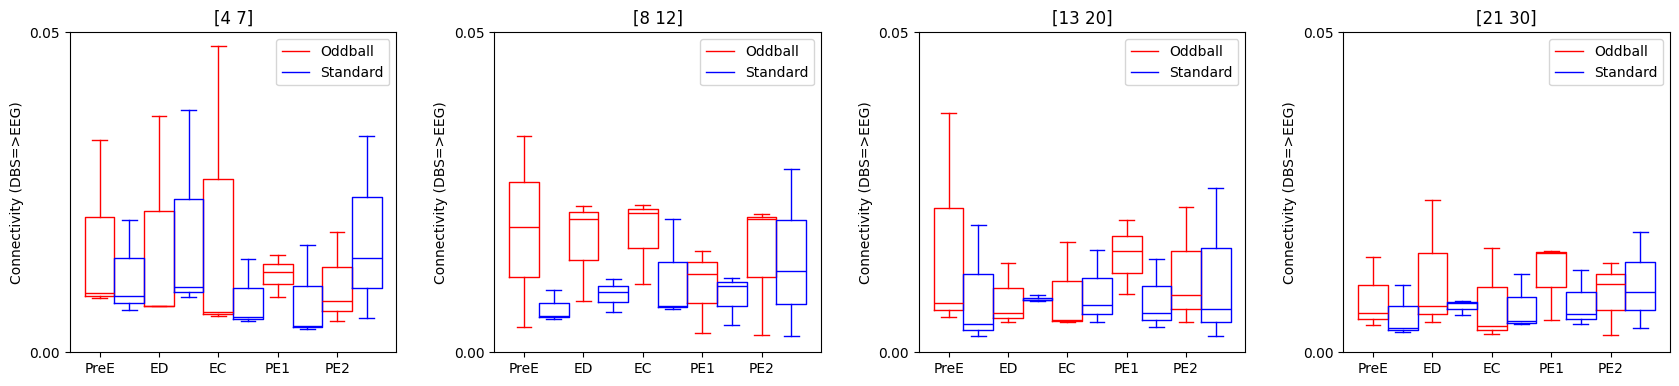

In [90]:
#GC box plots
#Responders

base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
#subj_list = ['007', '008', '011' ,'013', '014', '015']
subj_list_r_imp = [7, 8, 11]

subj_list_nr_imp = [13, 14, 15]
subj_list_nr_exp = [7, 8, 11, 14, 15]
conditions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
phase = ['PreE', 'ED', 'EC', 'PE1', 'PE2']
direct = ["dbs_eeg", "eeg_dbs"]

GC_all = []
for st in stg:
    for sub in subj_list:
        GC_all2 = []
        if st == "implant" and sub in subj_list_r_imp or st == "explant" and sub == 13:

            for cond in conditions:
                GC_all3 = []

                for fb, ax in zip(freq_band,axes):
                    GC_all1=[]

                    coh1 = gc_sub_dbs_eeg[gc_sub_dbs_eeg["Stage"]==st]
                    coh2 = coh1[coh1["Subject"]==sub]
                    coh3 = coh2[coh2["Condition"]==cond]
                    coh4 = coh3[coh3["Freq"]==fb]
                    coh5 = coh4[coh4["DBS"]==np.array(coh4["DBS"])[0]]
                    #print(np.array(coh4["DBS"])[0])
                    GC_all1.append(coh5.GC)
                    GC_all11 = list(np.array(GC_all1).mean(axis=0))


                    GC_all3.append(GC_all11)
                GC_all2.append(GC_all3)
            GC_all.append(GC_all2)
GC_all = np.array(GC_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
GC_all_subs = np.rollaxis(GC_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([GC_all_subs[i,:,0,0],
                GC_all_subs[i,:,0,1],
                GC_all_subs[i,:,0,2],
                GC_all_subs[i,:,0,3],
                GC_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([GC_all_subs[i,:,1,0],
                GC_all_subs[i,:,1,1],
                GC_all_subs[i,:,1,2],
                GC_all_subs[i,:,1,3],
                GC_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('Connectivity (DBS=>EEG)')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0,0.1,0.05)
    ax.set_yticks(yticks)

    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


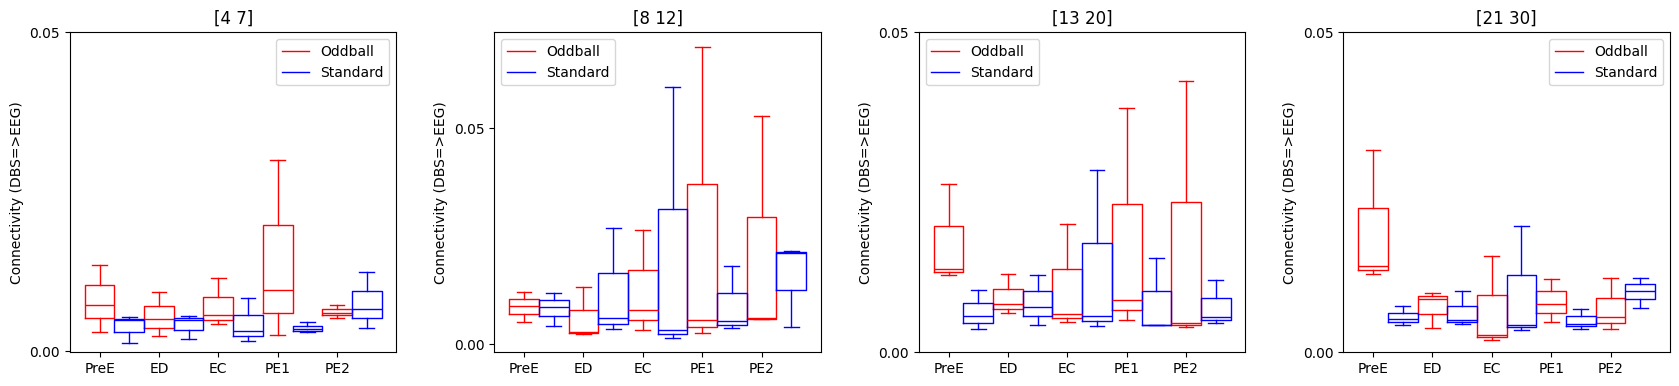

In [93]:
#GC box plots
#Non Responders

base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
#subj_list = ['007', '008', '011' ,'013', '014', '015']
subj_list_r_imp = [7, 8, 11]

subj_list_nr_imp = [13, 14, 15]
subj_list_nr_exp = [7, 8, 11, 14, 15]
conditions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
phase = ['PreE', 'ED', 'EC', 'PE1', 'PE2']
direct = ["dbs_eeg", "eeg_dbs"]

GC_all = []
for st in stg:
    for sub in subj_list:
        GC_all2 = []
        if st == "implant" and sub not in subj_list_r_imp or st == "explant" and sub != 13:

            for cond in conditions:
                GC_all3 = []

                for fb, ax in zip(freq_band,axes):
                    GC_all1=[]

                    coh1 = gc_sub_dbs_eeg[gc_sub_dbs_eeg["Stage"]==st]
                    coh2 = coh1[coh1["Subject"]==sub]
                    coh3 = coh2[coh2["Condition"]==cond]
                    coh4 = coh3[coh3["Freq"]==fb]
                    coh5 = coh4[coh4["DBS"]==np.array(coh4["DBS"])[0]]
                    #print(np.array(coh4["DBS"])[0])
                    GC_all1.append(coh5.GC)
                    GC_all11 = list(np.array(GC_all1).mean(axis=0))


                    GC_all3.append(GC_all11)
                GC_all2.append(GC_all3)
            GC_all.append(GC_all2)
GC_all = np.array(GC_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
GC_all_subs = np.rollaxis(GC_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([GC_all_subs[i,:,0,0],
                GC_all_subs[i,:,0,1],
                GC_all_subs[i,:,0,2],
                GC_all_subs[i,:,0,3],
                GC_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([GC_all_subs[i,:,1,0],
                GC_all_subs[i,:,1,1],
                GC_all_subs[i,:,1,2],
                GC_all_subs[i,:,1,3],
                GC_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('Connectivity (DBS=>EEG)')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0,0.1,0.05)
    ax.set_yticks(yticks)

    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


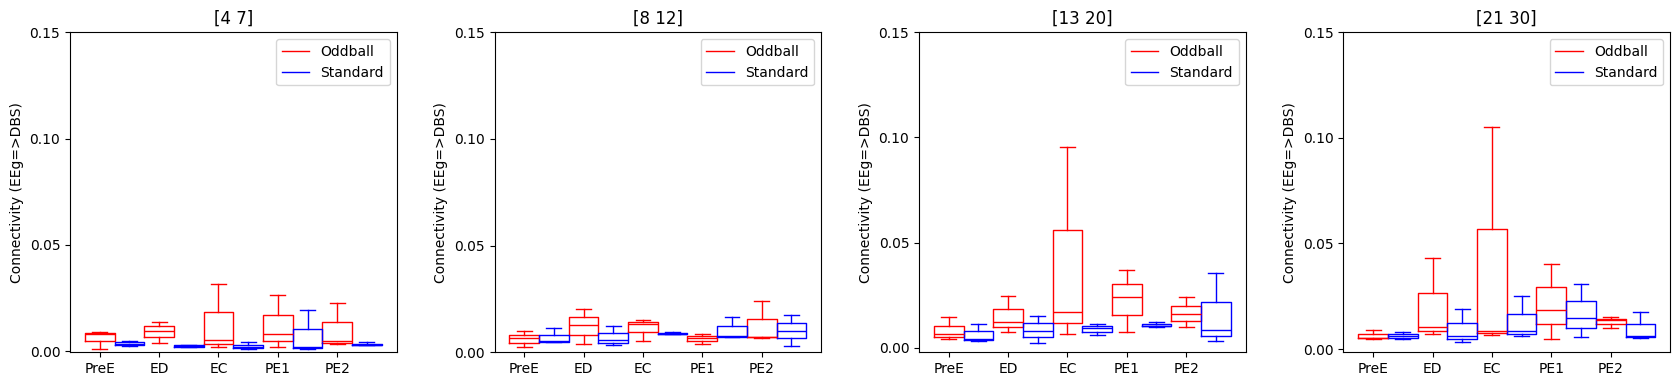

In [97]:
#GC box plots
#Responders

base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
#subj_list = ['007', '008', '011' ,'013', '014', '015']
subj_list_r_imp = [7, 8, 11]

subj_list_nr_imp = [13, 14, 15]
subj_list_nr_exp = [7, 8, 11, 14, 15]
conditions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
phase = ['PreE', 'ED', 'EC', 'PE1', 'PE2']
direct = ["dbs_eeg", "eeg_dbs"]

GC_all = []
for st in stg:
    for sub in subj_list:
        GC_all2 = []
        if st == "implant" and sub in subj_list_r_imp or st == "explant" and sub == 13:

            for cond in conditions:
                GC_all3 = []

                for fb, ax in zip(freq_band,axes):
                    GC_all1=[]

                    coh1 = gc_sub_eeg_dbs[gc_sub_eeg_dbs["Stage"]==st]
                    coh2 = coh1[coh1["Subject"]==sub]
                    coh3 = coh2[coh2["Condition"]==cond]
                    coh4 = coh3[coh3["Freq"]==fb]
                    coh5 = coh4[coh4["DBS"]==np.array(coh4["DBS"])[0]]
                    #print(np.array(coh4["DBS"])[0])
                    GC_all1.append(coh5.GC)
                    GC_all11 = list(np.array(GC_all1).mean(axis=0))


                    GC_all3.append(GC_all11)
                GC_all2.append(GC_all3)
            GC_all.append(GC_all2)
GC_all = np.array(GC_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
GC_all_subs = np.rollaxis(GC_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([GC_all_subs[i,:,0,0],
                GC_all_subs[i,:,0,1],
                GC_all_subs[i,:,0,2],
                GC_all_subs[i,:,0,3],
                GC_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([GC_all_subs[i,:,1,0],
                GC_all_subs[i,:,1,1],
                GC_all_subs[i,:,1,2],
                GC_all_subs[i,:,1,3],
                GC_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('Connectivity (EEg=>DBS)')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0,0.2,0.05)
    ax.set_yticks(yticks)

    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


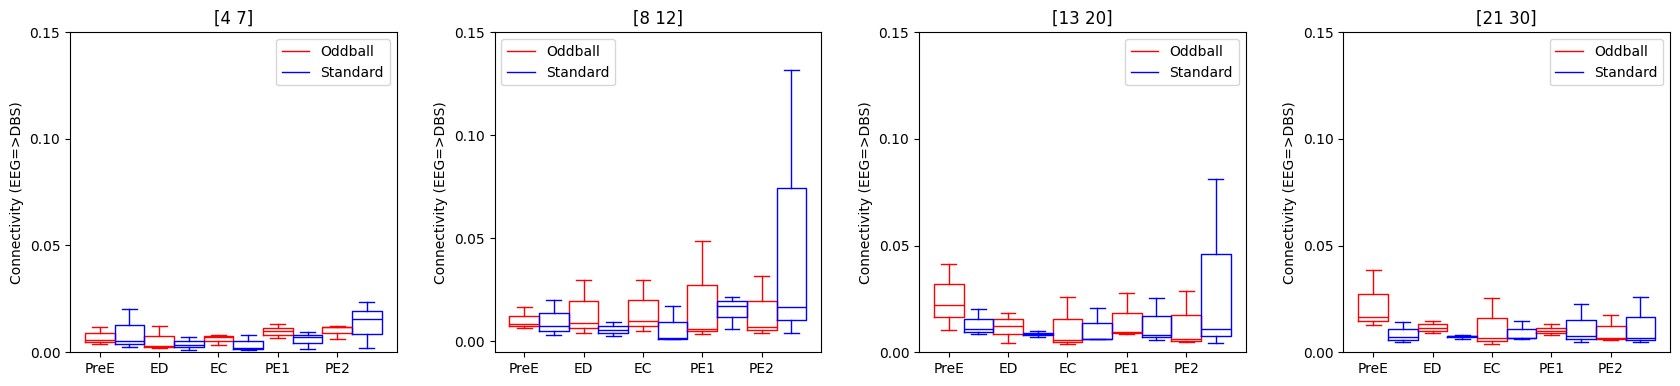

In [98]:
#GC box plots
#Non Responders

base_dir = "E:/Oddball Data/"

stg = ['implant'] #'implant','explant'
subj_list = [7, 8, 11 ,13, 14, 15]
#subj_list = ['007', '008', '011' ,'013', '014', '015']
subj_list_r_imp = [7, 8, 11]

subj_list_nr_imp = [13, 14, 15]
subj_list_nr_exp = [7, 8, 11, 14, 15]
conditions = ['Oddball', 'Standard']
freq_band = ['[4 7]','[8 12]', '[13 20]', '[21 30]']
phase = ['PreE', 'ED', 'EC', 'PE1', 'PE2']
direct = ["dbs_eeg", "eeg_dbs"]

GC_all = []
for st in stg:
    for sub in subj_list:
        GC_all2 = []
        if st == "implant" and sub not in subj_list_r_imp or st == "explant" and sub != 13:

            for cond in conditions:
                GC_all3 = []

                for fb, ax in zip(freq_band,axes):
                    GC_all1=[]

                    coh1 = gc_sub_eeg_dbs[gc_sub_eeg_dbs["Stage"]==st]
                    coh2 = coh1[coh1["Subject"]==sub]
                    coh3 = coh2[coh2["Condition"]==cond]
                    coh4 = coh3[coh3["Freq"]==fb]
                    coh5 = coh4[coh4["DBS"]==np.array(coh4["DBS"])[0]]
                    #print(np.array(coh4["DBS"])[0])
                    GC_all1.append(coh5.GC)
                    GC_all11 = list(np.array(GC_all1).mean(axis=0))


                    GC_all3.append(GC_all11)
                GC_all2.append(GC_all3)
            GC_all.append(GC_all2)
GC_all = np.array(GC_all)
#ERDS_all_subs = ERDS_all.mean(axis=3)
GC_all_subs = np.rollaxis(GC_all, 2,0)


fig, axes = plt.subplots(1,4, figsize=(20,4))

colors = ['pink', 'lightblue']*4
c = "red"

for i, (fb, ax) in enumerate(zip(freq_band,axes)):
    c = "red"
    box1 = ax.boxplot([GC_all_subs[i,:,0,0],
                GC_all_subs[i,:,0,1],
                GC_all_subs[i,:,0,2],
                GC_all_subs[i,:,0,3],
                GC_all_subs[i,:,0,4]],positions=[1,2,3,4,5])

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c)
    plt.setp(box1["boxes"], color=c)
    plt.setp(box1["fliers"], markeredgecolor=c)

    c2 = 'blue'

    box2 = ax.boxplot([GC_all_subs[i,:,1,0],
                GC_all_subs[i,:,1,1],
                GC_all_subs[i,:,1,2],
                GC_all_subs[i,:,1,3],
                GC_all_subs[i,:,1,4]],positions=[1.5,2.5,3.5,4.5,5.5]
              )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color=c2)
    plt.setp(box2["boxes"], color=c2)
    plt.setp(box2["fliers"], markeredgecolor=c2)        


    ax.set_ylabel('Connectivity (EEG=>DBS)')
    ax.set_title(fb)
    ax.set_xlim(0.5,6)
    ax.set_xticks([1,2,3,4,5], [1,2,3,4,5])
    ax.set_xticklabels(phase)
    #ax.legend(('Oddball', 'Standard'))
    yticks = np.arange(-0,0.2,0.05)
    ax.set_yticks(yticks)

    ax.legend([box1["boxes"][0], box2["boxes"][0]], conditions)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


No baseline correction applied


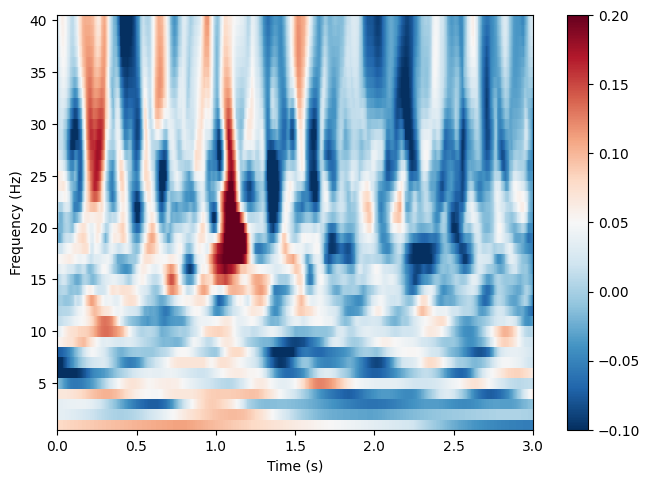

[<Figure size 640x480 with 2 Axes>]

In [47]:
base_dir = "E:/Oddball Data/"
subj_list = ['007','008','011']

stg = ['implant']#, 'implant']explant

CCC= []

for st in stg:
    for sub in subj_list:        
        file = f"{base_dir}CCC_{sub}_{st}.npy"
        CCC.append(np.load(file))
CCC = np.array(CCC)
CCC = CCC.mean(axis=0)
CCC= CCC.reshape(1,CCC.shape[0],CCC.shape[1])

tmin = 0
tmax = 3
vmax=0.2
vmin=-0.1
tfr_diff = mne.time_frequency.AverageTFR(epochs_aff_odd.copy().pick('C4').info, CCC, epochs_aff_odd.times, np.arange(1,41), len(epochs_aff_odd))

tfr_diff.plot('C4', tmin=tmin,tmax=tmax, vmax=vmax,vmin=vmin)


No baseline correction applied


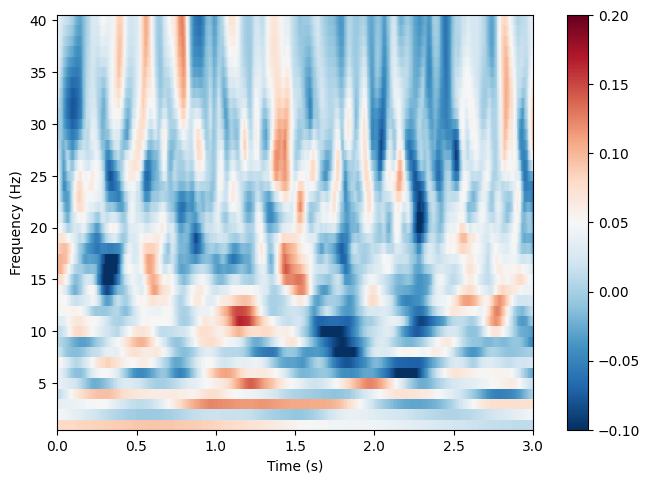

[<Figure size 640x480 with 2 Axes>]

In [46]:
base_dir = "E:/Oddball Data/"
subj_list = ['013','014','015']

stg = ['implant']#, 'implant']explant

CCC= []

for st in stg:
    for sub in subj_list:        
        file = f"{base_dir}CCC_{sub}_{st}.npy"
        CCC.append(np.load(file))
CCC = np.array(CCC)
CCC = CCC.mean(axis=0)
CCC= CCC.reshape(1,CCC.shape[0],CCC.shape[1])

tmin = 0
tmax = 3
vmax=0.2
vmin=-0.1
tfr_diff = mne.time_frequency.AverageTFR(epochs_aff_odd.copy().pick('C4').info, CCC, epochs_aff_odd.times, np.arange(1,41), len(epochs_aff_odd))

tfr_diff.plot('C4', tmin=tmin,tmax=tmax, vmax=vmax,vmin=vmin)


No baseline correction applied


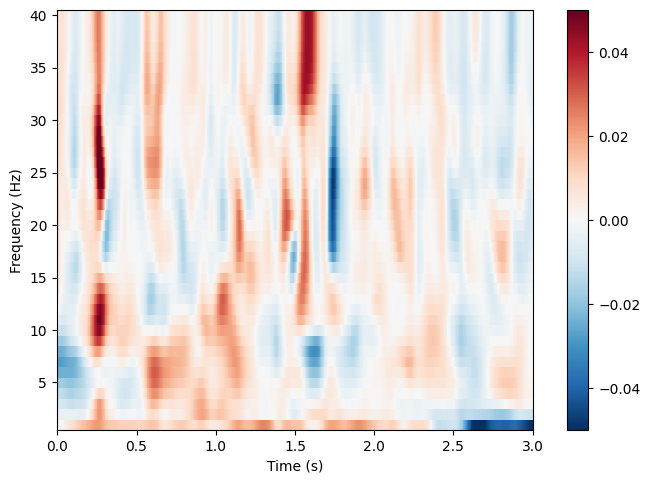

No baseline correction applied


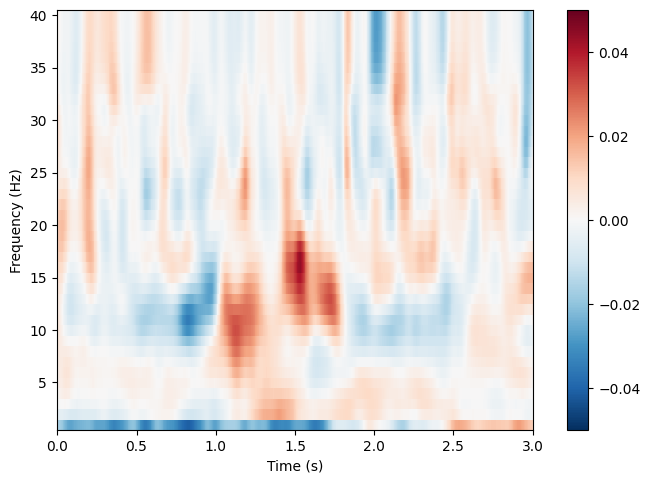

[<Figure size 640x480 with 2 Axes>]

In [56]:
base_dir = "E:/Oddball Data/"
subj_list = ['007','008','011']

stg = ['implant']#, 'implant']explant

GC_dbs_eeg= []

for st in stg:
    for sub in subj_list:        
        file = f"{base_dir}GC_dbs_eeg_{sub}_{st}.npy"
        GC_dbs_eeg.append(np.load(file))
GC_dbs_eeg = np.array(GC_dbs_eeg)
GC_dbs_eeg = GC_dbs_eeg.mean(axis=0)
GC_dbs_eeg= GC_dbs_eeg.reshape(1,GC_dbs_eeg.shape[0],GC_dbs_eeg.shape[1])

tmin = 0
tmax = 3
vmax=0.05
vmin=-0.05
tfr_diff_GC_dbs_eeg = mne.time_frequency.AverageTFR(epochs_aff_odd.copy().pick('C4').info, GC_dbs_eeg, epochs_aff_odd.times, np.arange(1,41), len(epochs_aff_odd))

tfr_diff_GC_dbs_eeg.plot('C4', tmin=tmin,tmax=tmax, vmax=vmax,vmin=vmin)

base_dir = "E:/Oddball Data/"
subj_list = ['013','014','015']

stg = ['implant']#, 'implant']explant

GC_dbs_eeg= []

for st in stg:
    for sub in subj_list:        
        file = f"{base_dir}GC_dbs_eeg_{sub}_{st}.npy"
        GC_dbs_eeg.append(np.load(file))
GC_dbs_eeg = np.array(GC_dbs_eeg)
GC_dbs_eeg = GC_dbs_eeg.mean(axis=0)
GC_dbs_eeg= GC_dbs_eeg.reshape(1,GC_dbs_eeg.shape[0],GC_dbs_eeg.shape[1])

tmin = 0
tmax = 3
vmax=0.05
vmin=-0.05
tfr_diff_GC_dbs_eeg = mne.time_frequency.AverageTFR(epochs_aff_odd.copy().pick('C4').info, GC_dbs_eeg, epochs_aff_odd.times, np.arange(1,41), len(epochs_aff_odd))

tfr_diff_GC_dbs_eeg.plot('C4', tmin=tmin,tmax=tmax, vmax=vmax,vmin=vmin)


No baseline correction applied


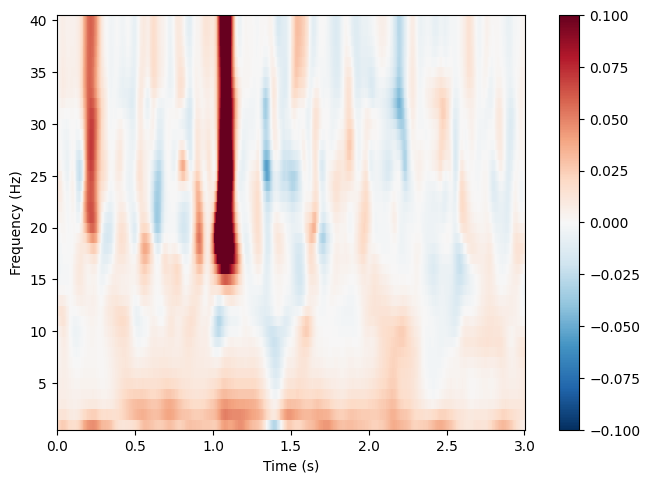

No baseline correction applied


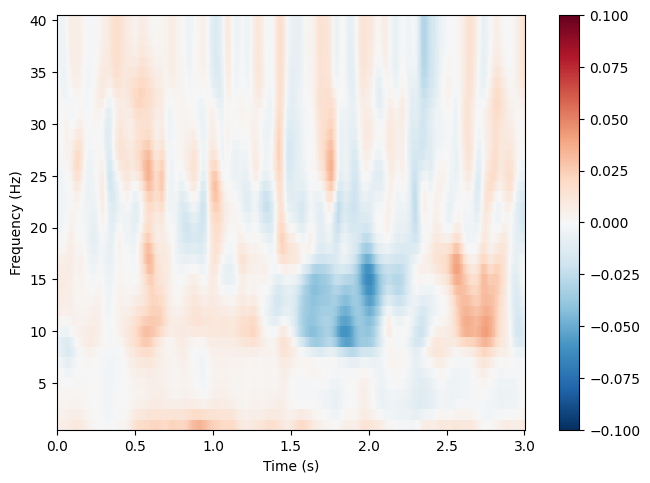

[<Figure size 640x480 with 2 Axes>]

In [62]:
base_dir = "E:/Oddball Data/"
subj_list = ['007','008','011']

stg = ['implant']#, 'implant']explant

GC_eeg_dbs= []

for st in stg:
    for sub in subj_list:        
        file = f"{base_dir}GC_eeg_dbs_{sub}_{st}.npy"
        GC_eeg_dbs.append(np.load(file))
GC_eeg_dbs = np.array(GC_eeg_dbs)
GC_eeg_dbs = GC_eeg_dbs.mean(axis=0)
GC_eeg_dbs= GC_eeg_dbs.reshape(1,GC_eeg_dbs.shape[0],GC_eeg_dbs.shape[1])

tmin = 0
tmax = 3
vmax=0.1
vmin=-0.1
tfr_diff_GC_eeg_dbs = mne.time_frequency.AverageTFR(epochs_aff_odd.copy().pick('C4').info, GC_eeg_dbs, epochs_aff_odd.times, np.arange(1,41), len(epochs_aff_odd))

tfr_diff_GC_eeg_dbs.plot('C4', tmin=tmin,tmax=tmax, vmax=vmax,vmin=vmin)

base_dir = "E:/Oddball Data/"
subj_list = ['013','014','015']

stg = ['implant']#, 'implant']explant

GC_eeg_dbs= []

for st in stg:
    for sub in subj_list:        
        file = f"{base_dir}GC_eeg_dbs_{sub}_{st}.npy"
        GC_eeg_dbs.append(np.load(file))
GC_eeg_dbs = np.array(GC_eeg_dbs)
GC_eeg_dbs = GC_eeg_dbs.mean(axis=0)
GC_eeg_dbs= GC_eeg_dbs.reshape(1,GC_eeg_dbs.shape[0],GC_eeg_dbs.shape[1])

tmin = 0
tmax = 3
vmax=0.1
vmin=-0.1
tfr_diff_GC_eeg_dbs = mne.time_frequency.AverageTFR(epochs_aff_odd.copy().pick('C4').info, GC_eeg_dbs, epochs_aff_odd.times, np.arange(1,41), len(epochs_aff_odd))

tfr_diff_GC_eeg_dbs.plot('C4', tmin=tmin,tmax=tmax, vmax=vmax,vmin=vmin)


In [1]:
GC_dbs_eeg = tfr_diff_dbs_eeg.data.mean(axis=0)
file = f"{base_dir}GC_dbs_eeg_{sub}_{st}"
np.save(file,GC_dbs_eeg)

GC_odd_dbs_eeg = tfr_odd_dbs_eeg.data.mean(axis=0)
file = f"{base_dir}GC_dbs_eeg_Oddball_{sub}_{st}"
np.save(file,GC_odd_dbs_eeg)

GC_typ_dbs_eeg = tfr_typ_dbs_eeg.data.mean(axis=0)
file = f"{base_dir}GC_dbs_eeg_Standard_{sub}_{st}"
np.save(file,GC_typ_dbs_eeg)


GC_eeg_dbs = tfr_diff_eeg_dbs.data.mean(axis=0)
file = f"{base_dir}GC_eeg_dbs_{sub}_{st}"
np.save(file,GC_eeg_dbs)

GC_odd_eeg_dbs = tfr_odd_eeg_dbs.data.mean(axis=0)
file = f"{base_dir}GC_eeg_dbs_Oddball_{sub}_{st}"
np.save(file,GC_odd_eeg_dbs)

GC_typ_eeg_dbs = tfr_typ_eeg_dbs.data.mean(axis=0)
file = f"{base_dir}GC_eeg_dbs_Standard_{sub}_{st}"
np.save(file,GC_typ_eeg_dbs)


NameError: name 'tfr_diff' is not defined